Task 1


In [144]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from ydata_profiling import ProfileReport
import scipy.stats as stats
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer



In [145]:
file_path = "/Users/godfreykrutzsch/Desktop/MSc/Assignment/samplesuperstore2023T3.csv"
df_customer_order_info = pd.read_csv(file_path)
print(df_customer_order_info.head(10))

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0    7773  CA-2016-108196  25/11/2016  12/02/2016  Standard Class    CS-12505   
1     684  US-2017-168116  11/04/2017  11/04/2017        Same Day    GT-14635   
2    9775  CA-2014-169019  26/07/2014  30/07/2014  Standard Class    LF-17185   
3    3012  CA-2017-134845  17/04/2017  24/04/2017  Standard Class    SR-20425   
4    4992  US-2017-122714  12/07/2017  13/12/2017  Standard Class    HG-14965   
5    3152  CA-2015-147830  15/12/2015  18/12/2015     First Class    NF-18385   
6    5311  CA-2017-131254  19/11/2017  21/11/2017     First Class    NC-18415   
7    9640  CA-2015-116638  28/01/2015         NaN    Second Class    JH-15985   
8    1200  CA-2016-130946  04/08/2016  04/12/2016  Standard Class    ZC-21910   
9    2698  CA-2014-145317  18/03/2014  23/03/2014  Standard Class    SM-20320   

      Customer Name      Segment        Country          City  ...  \
0     Cindy Stewart     Consumer  Unit

0.1 EDA

In [146]:
print(df_customer_order_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9993 non-null   object 
 2   Order Date     9992 non-null   object 
 3   Ship Date      9991 non-null   object 
 4   Ship Mode      9990 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9991 non-null   object 
 7   Segment        9991 non-null   object 
 8   Country        9990 non-null   object 
 9   City           9992 non-null   object 
 10  State          9990 non-null   object 
 11  Postal Code    9991 non-null   object 
 12  Region         9991 non-null   object 
 13  Product ID     9992 non-null   object 
 14  Category       9992 non-null   object 
 15  Sub-Category   9990 non-null   object 
 16  Product Name   9991 non-null   object 
 17  Sales          9993 non-null   float64
 18  Quantity

In [147]:
print(df_customer_order_info.shape)
print("verify features", df_customer_order_info.columns)

(9994, 21)
verify features Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [148]:
# check for duplicates in dataset
duplicates = df_customer_order_info.duplicated()
print(duplicates.sum())

0


In [149]:
"""
There are 63 missing values across the dataset, as well as values with the wrong datatype, NaNs in numeric fields. To get the whole view it would be sensible to clean the data population and run some exploratory analysis against the population of dataset and some samples of the dataset. This will enable a deeper and more thorough analysis.
"""
# count the number missing values across dataset
print("The missing values", df_customer_order_info.isnull().sum())
print("The total number of missing values across dataframe", df_customer_order_info.isna().sum().sum())

The missing values Row ID            0
Order ID          1
Order Date        2
Ship Date         3
Ship Mode         4
Customer ID       0
Customer Name     3
Segment           3
Country           4
City              2
State             4
Postal Code       3
Region            3
Product ID        2
Category          2
Sub-Category      4
Product Name      3
Sales             1
Quantity          5
Discount          3
Profit           11
dtype: int64
The total number of missing values across dataframe 63


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.11/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Technology'')
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
/opt/anaconda3/lib/python3.11/site-packages/ydata_profiling/model/missing.py:78: UserWarning: There was an attempt to generate the Heatmap missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_repo

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

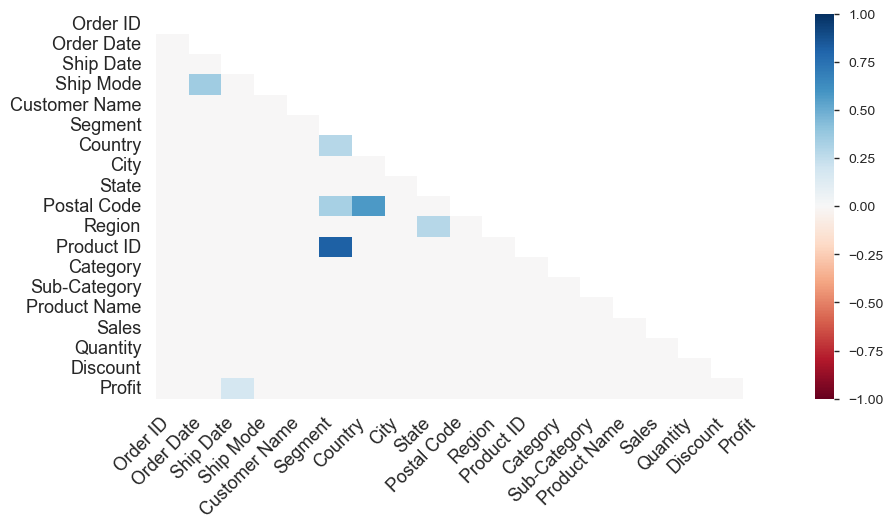

In [150]:
profile = ProfileReport(df_customer_order_info)
profile.to_file("/Users/godfreykrutzsch/GIT/report.html")

0.2 Data preprocessing

In [151]:
# First we put all 4 numeric features in a numeric dataframe.
df_numeric_cust_features = pd.DataFrame()
df_numeric_cust_features['Sales'] = df_customer_order_info['Sales']
df_numeric_cust_features['Quantity'] = df_customer_order_info['Quantity']
df_numeric_cust_features['Discount'] = df_customer_order_info['Discount']
df_numeric_cust_features['Profit'] = df_customer_order_info['Profit']

print("numeric feature shape", df_numeric_cust_features.shape)

numeric feature shape (9994, 4)


0.3 Data processing

In [152]:
# Second we group all categorical features into a dataframe.
df_categorical_cust_info = df_customer_order_info
df_categorical_cust_info.drop('Sales', axis=1, inplace=True)
df_categorical_cust_info.drop('Quantity', axis=1, inplace=True)
df_categorical_cust_info.drop('Discount', axis=1, inplace=True)
df_categorical_cust_info.drop('Profit', axis=1, inplace=True)

print("categorical feature shape", df_categorical_cust_info.shape)

categorical feature shape (9994, 17)


0.4 Data preprocessing and data cleaning

In [153]:
# Eliminate bad data in Quantity field needed for downstream analysis and standardise numeric datasets to float64.

for column in df_numeric_cust_features.columns:
    unique_values = df_numeric_cust_features[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Sales: [ 4499.985  7999.98   2177.584 ... 10499.97  13999.96  17499.95 ]
Unique values in Quantity: ['5' '4' '8' 'Two' '6' 'Thirteen' '7' '3' 'Seven' '9' nan '12' '2' 'ten'
 '10' '7?' '1' '14' '13' '11']
Unique values in Discount: [0.7  0.5  0.8  0.4  0.2  0.3  0.45 0.32 0.6   nan 0.15 0.1  0.  ]
Unique values in Profit: ['-6599.978' '-3839.9904' '-3701.8928' ... '5039.9856' '6719.9808'
 '8399.976']


In [154]:
# clean data using replace() to standardize numbers.

df_numeric_cust_features['Quantity'] = df_numeric_cust_features['Quantity'].replace("Two", 2)
df_numeric_cust_features['Quantity'] = df_numeric_cust_features['Quantity'].replace("Thirteen", 13)
df_numeric_cust_features['Quantity'] = df_numeric_cust_features['Quantity'].replace("Seven", 7)
df_numeric_cust_features['Quantity'] = df_numeric_cust_features['Quantity'].replace("7?", 7)
df_numeric_cust_features['Quantity'] = df_numeric_cust_features['Quantity'].replace("ten", 7)
df_numeric_cust_features['Quantity'] = df_numeric_cust_features['Quantity'].replace("Seven", 7)

# standardize quantity datatype to float64, thus consistent with other numeric datatypes.
df_numeric_cust_features['Quantity'] = df_numeric_cust_features['Quantity'].astype(float)

In [155]:
# check that quantity is now float64
df_numeric_cust_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sales     9993 non-null   float64
 1   Quantity  9989 non-null   float64
 2   Discount  9991 non-null   float64
 3   Profit    9983 non-null   object 
dtypes: float64(3), object(1)
memory usage: 312.4+ KB


0.5 data preprocessing: NaNs and imputation

In [156]:
# plug missing values and NaNs in the numeric dataframe
imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=0), max_iter=10, random_state=0)

In [157]:
df_numeric_cust_features['Quantity'] = imputer.fit_transform(df_numeric_cust_features[['Quantity']])
df_numeric_cust_features['Sales'] = imputer.fit_transform(df_numeric_cust_features[['Sales']])
df_numeric_cust_features['Discount'] = imputer.fit_transform(df_numeric_cust_features[['Discount']])
df_numeric_cust_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sales     9994 non-null   float64
 1   Quantity  9994 non-null   float64
 2   Discount  9994 non-null   float64
 3   Profit    9983 non-null   object 
dtypes: float64(3), object(1)
memory usage: 312.4+ KB


0.6 Data processing: bad data eliminated 

In [158]:
df_numeric_cust_features.isnull().sum()

Sales        0
Quantity     0
Discount     0
Profit      11
dtype: int64

0.7 Data processioning: Profit: bad data clean and impute NaNs

In [159]:
# clean bad data use replace
# use ML to predict values for missing values and NaNs
# standardize data type to float64 for numeric consistency
df_numeric_cust_features['Profit'] = df_numeric_cust_features['Profit'].apply(lambda x: str(x).replace('"', '').strip())
df_numeric_cust_features['Profit'].astype(float)
df_numeric_cust_features['Profit'] = imputer.fit_transform(df_numeric_cust_features[['Profit']])

In [160]:
#Check to ensure there are no blanks or NaNs left in Profit and that it is clean.
profit_nan =df_numeric_cust_features['Profit'].isna().sum()
print(profit_nan)

0


In [161]:
#check numeric datatypes have been standardized.
df_numeric_cust_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sales     9994 non-null   float64
 1   Quantity  9994 non-null   float64
 2   Discount  9994 non-null   float64
 3   Profit    9994 non-null   float64
dtypes: float64(4)
memory usage: 312.4 KB


0.8 Review numeric data has been cleaned.

In [162]:
numeric_file_path = "/Users/godfreykrutzsch/Desktop/MSc/Assignment/SenseCheck.csv"
df_numeric_cust_features.to_csv(numeric_file_path, index=True)

0.9 Categorical missing values & cleaning

In [163]:
# We can solve some missing values, but not key features like Order_Id, Order_Date, Ship_date or Customer Name..
print("Missing categorical values",df_categorical_cust_info.isna().sum())
print("Total missing values", df_customer_order_info.isna().sum().sum())

Missing categorical values Row ID           0
Order ID         1
Order Date       2
Ship Date        3
Ship Mode        4
Customer ID      0
Customer Name    3
Segment          3
Country          4
City             2
State            4
Postal Code      3
Region           3
Product ID       2
Category         2
Sub-Category     4
Product Name     3
dtype: int64
Total missing values 43


In [164]:
# we clean city, country and plug missing values in segment, ship mode and city using frequency of occurrence with mode()
df_categorical_cust_info['City'].astype(str)
df_categorical_cust_info['Country'].fillna(df_categorical_cust_info['Country'].mode()[0], inplace=True)
df_categorical_cust_info['Country'].replace("US","United States", inplace=True)
df_categorical_cust_info['Country'].replace("56","United States", inplace=True)
df_categorical_cust_info['City'].fillna(df_categorical_cust_info['City'].mode()[0], inplace=True)
df_categorical_cust_info['Segment'].fillna(df_categorical_cust_info['Segment'].mode()[0], inplace=True)
df_categorical_cust_info['Ship Mode'].fillna(df_categorical_cust_info['Ship Mode'].mode()[0], inplace=True)

In [165]:
print("Missing categorical values",df_categorical_cust_info.isnull().sum())
print("Total missing categorical values", df_categorical_cust_info.isnull().sum().sum())

Missing categorical values Row ID           0
Order ID         1
Order Date       2
Ship Date        3
Ship Mode        0
Customer ID      0
Customer Name    3
Segment          0
Country          0
City             0
State            4
Postal Code      3
Region           3
Product ID       2
Category         2
Sub-Category     4
Product Name     3
dtype: int64
Total missing categorical values 30


Task 2

1.0 Descriptive statistics analysis: describe each feature

In [166]:
""" We will consider each features and generate a summary. We are in a unique position to make samples and compare these results against the population of data when relevant and justified. The small sample of 1000 rows will obviously draw some different results in comparison to the 9994 rows population, when justified, that we can compare during analysis for unique insights"""

# we make a sample to compare with the population for random sampling (Chen, Fan. 2021) 
df_numeric_data_sample = df_numeric_cust_features.sample(n=1000, random_state=42)
df_categorical_data_sample = df_categorical_cust_info.sample(n=1000, random_state=42)
df_customer_order_info.sample(n=1000, random_state=42)
print(df_numeric_data_sample.shape)
print(df_categorical_data_sample.shape)

(1000, 4)
(1000, 17)


In [167]:
# use describe function to generate default summary statistics including median, var, skew, kurtosis and *mode.
description  = df_numeric_data_sample.describe()
description.loc['median'] =df_numeric_data_sample.median()
description.loc['var'] =df_numeric_data_sample.var()
description.loc['skew'] =df_numeric_data_sample.skew()
description.loc['kurtosis'] =df_numeric_data_sample.kurtosis()
print(description)

                  Sales     Quantity     Discount        Profit
count       1000.000000  1000.000000  1000.000000   1000.000000
mean         261.229845     3.825000     0.164146     18.260954
std          605.287608     2.107324     0.215149    308.475623
min            0.898000     1.000000     0.000000  -6599.978000
25%           17.487000     2.000000     0.000000      1.314450
50%           62.340000     3.000000     0.200000      8.276400
75%          263.900000     5.000000     0.200000     31.141000
max         8399.976000    13.000000     0.800000   3177.475000
median        62.340000     3.000000     0.200000      8.276400
var       366373.088939     4.440816     0.046289  95157.209725
skew           6.376067     1.082236     1.628965     -9.746986
kurtosis      57.868905     1.263372     2.060771    243.091609


In [168]:
# we consider mode across numerical features as a summary statistic.
print("Sales mode")
print(df_numeric_data_sample['Sales'].mode())
print("Profit mode")
print(df_numeric_data_sample['Profit'].mode())
print("Discount mode")
print(df_numeric_data_sample['Discount'].mode())
print("Quantity mode")
print(df_numeric_data_sample['Quantity'].mode())

Sales mode
0    10.368
1    14.940
Name: Sales, dtype: float64
Profit mode
0    0.0
Name: Profit, dtype: float64
Discount mode
0    0.0
Name: Discount, dtype: float64
Quantity mode
0    3.0
Name: Quantity, dtype: float64


In [169]:
# the range and IQR give a feel for the spread.
data_range = np.max(df_numeric_data_sample) - np.min(df_numeric_data_sample)
print(data_range)

14999.954000000002


In [170]:
"""
    This code calculates the percentiles for each numeric feature from the data sample
"""

Q1 = np.percentile(df_numeric_data_sample, 25)
Q3 = np.percentile(df_numeric_data_sample, 75)
IQR = Q3-Q1
print("IQR", IQR)


Q1_s = np.percentile(df_numeric_data_sample['Sales'], 25)
Q3_s = np.percentile(df_numeric_data_sample['Sales'], 75)
IQR_s = Q3_s-Q1_s
print("Sales IQR",IQR_s)


Q1_p = np.percentile(df_numeric_data_sample['Profit'], 25)
Q3_p = np.percentile(df_numeric_data_sample['Profit'], 75)
IQR_p = Q3_p-Q1_p
print("Profit IQR", IQR_p)


Q1_d = np.percentile(df_numeric_data_sample['Discount'], 25)
Q3_d = np.percentile(df_numeric_data_sample['Discount'], 75)
IQR_d = Q3_d-Q1_d
print("Discount IQR",IQR_d)


Q1_q = np.percentile(df_numeric_data_sample['Quantity'], 25)
Q3_q = np.percentile(df_numeric_data_sample['Quantity'], 75)
IQR_q = Q3_q-Q1_q
print("Quantity IQR",IQR_q)

IQR 22.526
Sales IQR 246.41299999999998
Profit IQR 29.826549999999997
Discount IQR 0.2
Quantity IQR 3.0


In [171]:
# The most important customer SEGMENT is the Consumer division by order transactions.
df_categorical_data_sample['Segment'].mode()

0    Consumer
Name: Segment, dtype: object

In [172]:
# Using order date, how many orders (ORDER DATE) were their per year?

"""
    Describe features of the data set by generating summaries about data samples.
    This code classifies the order date as a datetime object, extracts the year and counts the number
    of orders per year using the order_date variable
"""

df_categorical_data_sample['Order Date'] = pd.to_datetime(df_categorical_data_sample['Order Date'], dayfirst=True)
df_categorical_data_sample['Order_Year'] = df_categorical_data_sample['Order Date'].dt.year
grouped = df_categorical_data_sample.groupby('Order_Year')['Order Date'].count()

print("The number of orders per year by order Date")
print(grouped)

The number of orders per year by order Date
Order_Year
2014    194
2015    220
2016    275
2017    311
Name: Order Date, dtype: int64


In [173]:
"""
    This code calculates the average number of days to ship using SHIP DATE and order date.
    Describe features of the data set by generating summaries about data samples
"""

df_categorical_data_sample['Ship Date'] = pd.to_datetime(df_categorical_data_sample['Ship Date'], dayfirst=True)
days_to_ship = df_categorical_data_sample['Ship Date'] - df_categorical_data_sample['Order Date']
average_days_to_ship = days_to_ship.mean()

print("The average days to ship per order with shipping date")
print(average_days_to_ship)

The average days to ship per order with shipping date
11 days 11:11:02.400000


In [174]:
# Who are the biggest CUSTOMER NAME who spend the most money(SALES)? 
"""
We have to use the population figure and not a sample for this feature generated summary. To understand the biggest customers we need to check the entire set and the sample biggest customers which is a subset is different to the population biggest customers.
Describe features of the data set by generating summaries about data samples
"""
cust_sale = pd.concat([df_categorical_cust_info, df_numeric_cust_features], axis=1)
biggest_customers = cust_sale.groupby('Customer Name')['Sales'].sum()
top_customers = biggest_customers.sort_values(ascending=False)
print(top_customers.head())
print(top_customers.tail())


Customer Name
Sean Miller      25043.050
Tamara Chand     19052.218
Raymond Buch     15117.339
Tom Ashbrook     14595.620
Adrian Barton    14473.571
Name: Sales, dtype: float64
Customer Name
Roy Skaria         22.328
Mitch Gastineau    16.739
Carl Jackson       16.520
Lela Donovan        5.304
Thais Sissman       4.833
Name: Sales, dtype: float64


In [175]:
# What categories (SUB-CATEGORIES) of products are the customers (SEGMENT) actually buying?

"""
We match segment with sub-category to spin up a heatmap what the customer type likes
Describe features of the data set by generating summaries about data samples
"""
df_cat_cust_products = pd.crosstab(df_categorical_data_sample['Segment'], df_categorical_data_sample['Sub-Category'])
print(df_cat_cust_products)


Sub-Category  Accessories  Appliances  Art  Binders  Bookcases  Chairs  \
Segment                                                                  
Consumer               32          24   44       69         16      42   
Corporate              22          18   30       47         12      20   
Home Office            11          11   23       27          2      18   

Sub-Category  Copiers  Envelopes  Fasteners  Furnishings  Labels  Machines  \
Segment                                                                      
Consumer            4         11          9           45      18         6   
Corporate           3         10          4           25       9         3   
Home Office         1          4          7           15       7         1   

Sub-Category  Paper  Phones  Storage  Supplies  Tables  
Segment                                                 
Consumer         70      39       44        12      18  
Corporate        40      32       19         5      11  
Home Offic

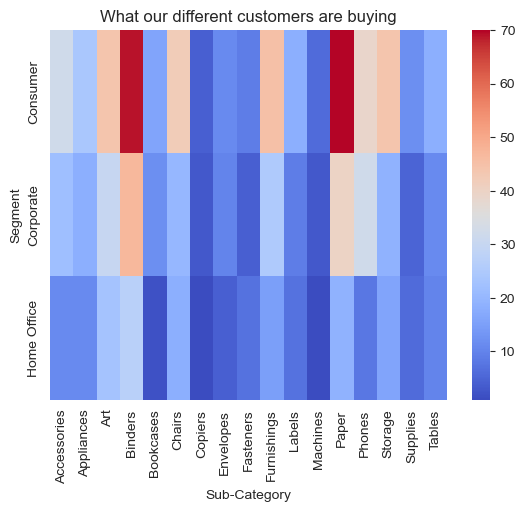

In [176]:
sns.heatmap(df_cat_cust_products, cmap='coolwarm')
plt.title("What our different customers are buying")
plt.show()

In [177]:
# What CATEGORIES are the most populous with customers?
"""
Describe features of the data set by generating summaries about data samples
"""
df_cat_cust_to_cat = pd.crosstab(df_categorical_data_sample['Segment'], df_categorical_data_sample['Category'])

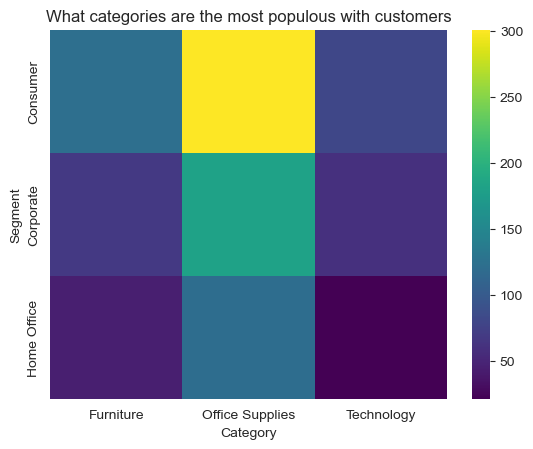

In [178]:
sns.heatmap(df_cat_cust_to_cat, cmap='viridis')
plt.title("What categories are the most populous with customers")
plt.show()

In [179]:
# What is the PRODUCT NAME of the most popular product sold?

"""
Describe features of the data set by generating summaries about data samples
"""
most_pop_product = df_categorical_data_sample['Product Name'].mode()
print(most_pop_product)

0    Easy-staple paper
Name: Product Name, dtype: object


In [180]:
# How many times is each product ordered (PRODUCT_ID)?
"""
using product id the number of times that product is ordered (order id) is calculated. There is not enough space to show the results so the result is "wrapped around" below because of long product names.
"""
product_order_count = df_categorical_data_sample.groupby(['Product ID','Product Name'])['Order ID'].count().reset_index(name='Products Ordered')
product_order_count_sorted = product_order_count.sort_values(by='Products Ordered', ascending=False)
print(product_order_count_sorted.head())
print(product_order_count_sorted.tail())


          Product ID                                       Product Name  \
173  OFF-AP-10000026  Tripp Lite Isotel 6 Outlet Surge Protector wit...   
303  OFF-BI-10000977                 Ibico Plastic Spiral Binding Combs   
350  OFF-BI-10003364                           Binding Machine Supplies   
554  OFF-ST-10000736  Carina Double Wide Media Storage Towers in Nat...   
27   FUR-CH-10000454  Hon Deluxe Fabric Upholstered Stacking Chairs,...   

     Products Ordered  
173                 5  
303                 4  
350                 4  
554                 4  
27                  4  
          Product ID                                       Product Name  \
292  OFF-BI-10000343  Pressboard Covers with Storage Hooks, 9 1/2" x...   
295  OFF-BI-10000494       Acco Economy Flexible Poly Round Ring Binder   
296  OFF-BI-10000545   GBC Ibimaster 500 Manual ProClick Binding System   
298  OFF-BI-10000666                              Surelock Post Binders   
758  TEC-PH-10004959          

In [181]:
# Which region are the majority of orders from REGION?
# snippet uses region to calculate number of orders.
sample_region_order_count = df_categorical_data_sample.groupby('Region').size().reset_index(name='Order Count')
sample_region_order_count_sorted = sample_region_order_count.sort_values(by='Order Count',ascending=False)
print(sample_region_order_count_sorted)
print(sample_region_order_count.shape)

    Region  Order Count
5     West          309
2     East          286
0  Central          239
4    South          164
1   Cntral            1
3      Est            1
(6, 2)


In [182]:
# Which state are the majority of orders from STATE?

"""
each row is a order from the spreadsheet so we just count the occurrences of state for each order
"""
sample_state_order_count = df_categorical_data_sample.groupby('State').size().reset_index(name='Order Count')
sample_state_order_count_sorted = sample_state_order_count.sort_values(by='Order Count',ascending=False)
print(sample_state_order_count_sorted)
print(sample_state_order_count.shape)

             State  Order Count
3       California          191
38           Texas          123
28        New York          111
33    Pennsylvania           66
30            Ohio           49
41      Washington           45
10        Illinois           38
8          Georgia           29
7          Florida           27
37       Tennessee           26
1          Arizona           25
29  North Carolina           24
40        Virginia           23
4         Colorado           22
18        Michigan           21
11         Indiana           17
17   Massachusetts           15
43       Wisconsin           12
14        Kentucky           12
32          Oregon           10
16        Maryland           10
26      New Jersey           10
6         Delaware            8
19       Minnesota            8
2         Arkansas            8
21        Missouri            7
5      Connecticut            7
34    Rhode Island            6
35  South Carolina            6
24          Nevada            6
23      

In [183]:
# Which CITIES receive the most orders?
sample_city_order_count = df_categorical_data_sample.groupby('City').size().reset_index(name='Order Count')
sample_city_order_count_sorted = sample_city_order_count.sort_values(by='Order Count',ascending=False)
print(sample_city_order_count_sorted.head())
print(sample_city_order_count_sorted.tail())
print(sample_city_order_count.shape)

              City  Order Count
158  New York City           91
126    Los Angeles           75
184   Philadelphia           64
95         Houston           51
218  San Francisco           50
           City  Order Count
121       Logan            1
123    Longmont            1
124    Longview            1
125      Lorain            1
130  Manchester            1
(261, 2)


In [184]:
#  How many orders (CUSTOMER ID)does each customers make? 
"""
this snippet uses a given customer id to find how many order ids are associated with it and adds the name of the customer. I used the population as the sample of 1000 did not reveal many orders associated with the customer id.
"""

number_of_orders = df_categorical_cust_info.groupby(['Customer ID','Customer Name'])['Order ID'].count()
number_of_orders_sorted = number_of_orders.sort_values(ascending=False)
print(number_of_orders_sorted.head())
print(number_of_orders_sorted.tail())

Customer ID  Customer Name   
WB-21850     William Brown       37
MA-17560     Matt Abelman        34
JL-15835     John Lee            34
PP-18955     Paul Prost          34
JD-15895     Jonathan Doherty    32
Name: Order ID, dtype: int64
Customer ID  Customer Name    
CJ-11875     Carl Jackson         1
JR-15700     Jocasta Rupert       1
RE-19405     Ricardo Emerson      1
CP-12340     10                   1
AO-10810     Anthony O'Donnell    1
Name: Order ID, dtype: int64


In [185]:
# Are all customers types hailing from the United States (COUNTRY)?
country_count = pd.crosstab(df_categorical_cust_info['Country'], columns='count')
print(country_count)

col_0          count
Country             
United States   9994


In [186]:
# to find most popular post code i used population as popular post code varied when i used a test 1000 sample
popular_post_code = df_categorical_cust_info['Postal Code'].value_counts()
print(popular_post_code.head())
print(popular_post_code.tail())

Postal Code
10035    263
10024    230
10009    229
94122    203
10011    193
Name: count, dtype: int64
Postal Code
66502    1
98002    1
60441    1
72762    1
59102    1
Name: count, dtype: int64


In [187]:
# a number of post codes belong to each city..
post_code_to_city = df_categorical_cust_info.groupby('Postal Code')['City'].value_counts().reset_index(name='count')
post_code_to_city_ordered = post_code_to_city.sort_values(by="count", ascending=False)
print(post_code_to_city_ordered.head())
print(post_code_to_city_ordered.tail())

    Postal Code           City  count
5         10035  New York City    263
4         10024  New York City    230
2         10009  New York City    229
582       94122  San Francisco    203
3         10011  New York City    193
    Postal Code            City  count
350       66502       Manhattan      1
345       65109  Jefferson City      1
337       63376    Saint Peters      1
331       61832        Danville      1
318       60477     Tinley Park      1


In [188]:
# What is the most popular SHIPPING MODE by the customers?
df_categorical_cust_info['Ship Mode'].mode()

0    Standard Class
Name: Ship Mode, dtype: object

In [189]:
# The total profit and sales the firm has generated to date are:
df_numeric_cust_features['Sales'].sum()

2297258.614079676

In [190]:
# profit generated to date
df_numeric_cust_features['Profit'].sum()

290632.1063493339

In [191]:
# profit margin to date
total_profit = df_numeric_cust_features['Profit'].sum() 
total_sales = df_numeric_cust_features['Sales'].sum()
profit_margin = (total_profit / total_sales) * 100
print(profit_margin)

12.651257658501214


In [192]:
#the average discount to date
average_discount_per_order = df_numeric_cust_features['Discount'].mean()
print(average_discount_per_order)

0.1561795616054449


Task 2

2.0 Outlier identification and treatment

2.1 Box plot highlights the outliers with IQR.

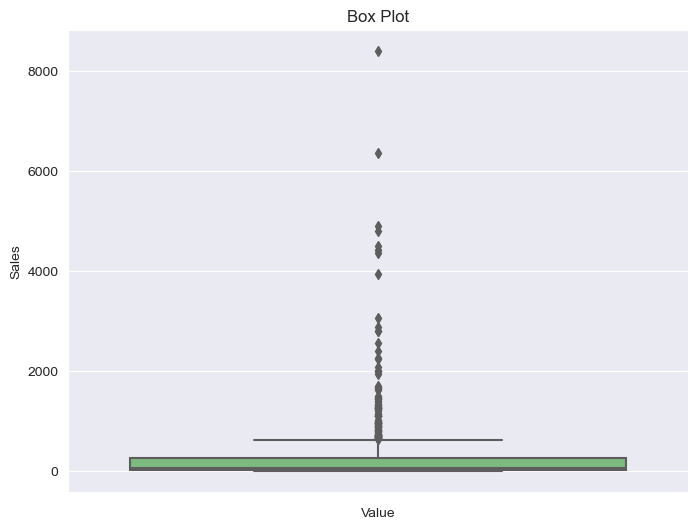

In [193]:
"""
we plot the sales sample into a box plot and calculate the boundaries for outliers
"""

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_numeric_data_sample['Sales'], palette="Greens")
plt.title('Box Plot')
plt.xlabel('Value')
plt.ylabel('Sales')
plt.show()

In [194]:
# Calculate the quartiles and IQR
Q1 = df_numeric_data_sample['Sales'].quantile(0.25)
Q3 = df_numeric_data_sample['Sales'].quantile(0.75)
IQR = Q3 - Q1

print("The quartiles")
print(Q1)
print(Q3)
print(IQR)

The quartiles
17.487
263.9
246.41299999999998


In [195]:
# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers.
outliers = df_numeric_data_sample[(df_numeric_data_sample['Sales'] < lower_bound) | (df_numeric_data_sample['Sales'] > upper_bound)]

# organize in order
outliers = outliers.sort_values(by='Sales', ascending=False)

print("Calculate All Outliers:")
print(outliers)

Calculate All Outliers:
         Sales  Quantity  Discount     Profit
9958  8399.976       4.0       0.4  1119.9968
9987  6354.950       5.0       0.0  3177.4750
9983  4899.930       7.0       0.0  2400.9657
9807  4799.984       2.0       0.2   359.9988
0     4499.985       5.0       0.7 -6599.9780
...        ...       ...       ...        ...
333    657.930       5.0       0.3   -93.9900
7645   647.840       8.0       0.0    32.3920
8606   646.272       8.0       0.2    64.6272
8457   643.136       4.0       0.2    56.2744
9542   638.820       9.0       0.0   185.2578

[109 rows x 4 columns]


2.2 Probability plot



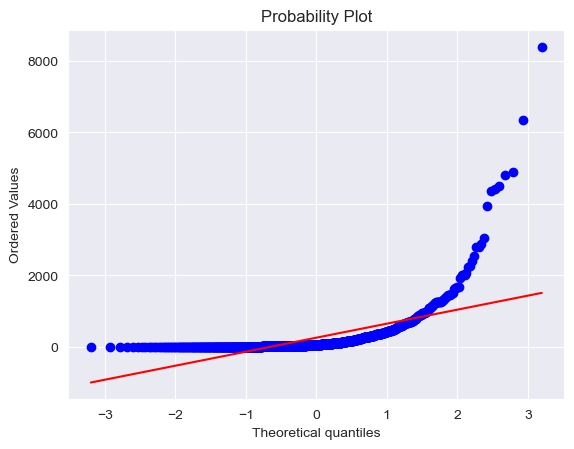

In [196]:
# the outliers are clearly highlighted where they break from the trajectory of the line.
# pass sample to probability plot to plot
fig = plt.figure()
res = stats.probplot(df_numeric_data_sample['Sales'], plot=plt)
plt.show()

2.3 Sales distribution curve 

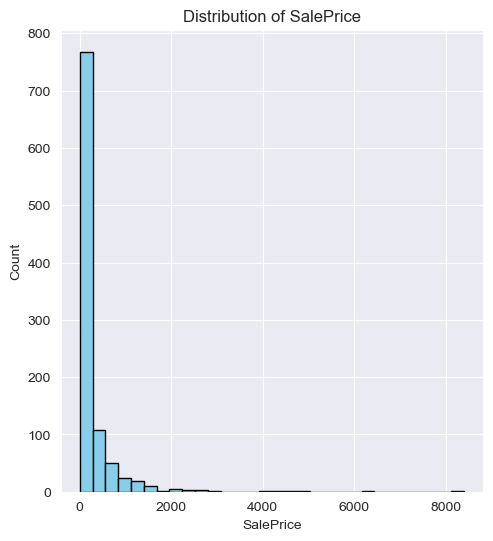

In [197]:
"""
The Sales data is a positive skew to the right this means
* The model highlights outliers and is not symmetric (Kaliyadan et al 2019)
* The outliers sales pull the average up along the long tail of the distribution """

# pass sample to histogram plot to plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_numeric_data_sample['Sales'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.show()

2.4 DBSCAN outlier detection Cheng Fan, Meiling Chen et al 29032921

In [198]:
"""
make a one col sample convert to 2D and standardize data points in sales using standard scaler.
"""

df_sales_sample_dbscan = df_numeric_cust_features['Sales'].sample(n=1000, random_state=42)
print(df_sales_sample_dbscan.shape)

# reshape single sales feature to be 2D
df_sales_reshape = df_sales_sample_dbscan.values.reshape(-1,1)

# normalise data
scaler_dbscan = StandardScaler()
scaled_sale_sample = scaler_dbscan.fit_transform(df_sales_reshape)

(1000,)


In [199]:
"""
create dbscan object and fit it to scaled sales numbers and populate cluster column with labels making two new columns
"""

#set distance btw samples
eps = 0.5
min_samples = 5 # min number samples in area
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(scaled_sale_sample)

# add labels 
df_sales_sample_dbscan = df_sales_sample_dbscan.reset_index(drop=True)
df_sales_sample_dbscan = pd.DataFrame(df_sales_sample_dbscan, columns=['Sales'])
df_sales_sample_dbscan['Cluster'] = labels
print(df_sales_sample_dbscan.shape)

(1000, 2)


In [200]:
"""
find outliers and assign -1 for identification
"""

outliers_ = df_sales_sample_dbscan[df_sales_sample_dbscan['Cluster'] == -1]
outliers_ = outliers_.sort_values(by='Sales', ascending=False)

print("Outliers found by DBSCAN method")
print(outliers_)

Outliers found by DBSCAN method
        Sales  Cluster
351  8399.976       -1
826  6354.950       -1
132  4899.930       -1
106  4799.984       -1
594  4499.985       -1
3    4416.174       -1
626  4355.168       -1
152  3930.072       -1


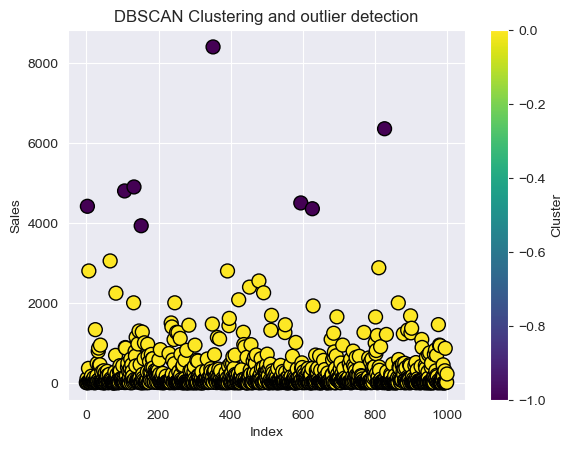

In [201]:
# use scatter to visualize the identified outliers
plt.scatter(df_sales_sample_dbscan.index, df_sales_sample_dbscan['Sales'],c=df_sales_sample_dbscan['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=100)
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('DBSCAN Clustering and outlier detection')
plt.colorbar(label='Cluster')
plt.show()

2.5 Outlier detection with KMeans, Cheng Fan, Meiling Chen et al 29032921


In [202]:
# spin up a sales data sample.
df_sales_sample_kmeans = df_numeric_cust_features[['Sales']].sample(n=1000, random_state=42)
print(df_sales_sample_kmeans.shape)

# 1: scale data using standard scaler
scaler = StandardScaler()
scaled_sales_sample = scaler.fit_transform(df_sales_sample_kmeans)

(1000, 1)


In [203]:
# 2: apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_sales_sample)
df_sales_sample_kmeans['Cluster'] = clusters
print(df_sales_sample_kmeans.shape)

(1000, 2)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [204]:
#3: calculate distances to centroids
centroids = kmeans.cluster_centers_
distances = np.linalg.norm(scaled_sales_sample - centroids[clusters], axis=1)
df_sales_sample_kmeans['Distance'] = distances
print(df_sales_sample_kmeans.shape)

(1000, 3)


In [205]:
#4: try and identify outliers
# define a threshold for outliers
threshold = df_sales_sample_kmeans['Distance'].mean() + 2 * df_sales_sample_kmeans['Distance'].std()
outliers_km = df_sales_sample_kmeans[df_sales_sample_kmeans['Distance'] > threshold]
outliers_km = outliers_km.sort_values(by='Distance', ascending=False)

print("Outliers found by K-means")
print(outliers_km)

Outliers found by K-means
          Sales  Cluster  Distance
9958  8399.9760        2  5.277729
9959  3050.3760        1  2.812304
9952  2879.9520        1  2.530604
9951  2799.9600        1  2.398383
9954  2799.9440        1  2.398356
31    3930.0720        2  2.110727
3     2549.9850        1  1.985191
9987  6354.9500        2  1.897436
101   2396.2656        1  1.731103
9822  2254.4100        1  1.496625
9873  2244.4800        1  1.480211
9968  4355.1680        2  1.408071
39    4416.1740        2  1.307232
9894  2079.4000        1  1.207345
0     4499.9850        2  1.168698
794   2003.9200        1  1.082581
96    2003.5200        1  1.081920
9893  2001.8600        1  1.079176
9785   735.9800        0  1.005305
9624   731.9400        0  0.998627
8531   754.4500        1  0.982710
450    720.0640        0  0.978997
9341   719.9760        0  0.978852
9585   714.3000        0  0.969470
9606   713.8800        0  0.968775
318    710.8320        0  0.963737
8713   705.5440        0  0.9

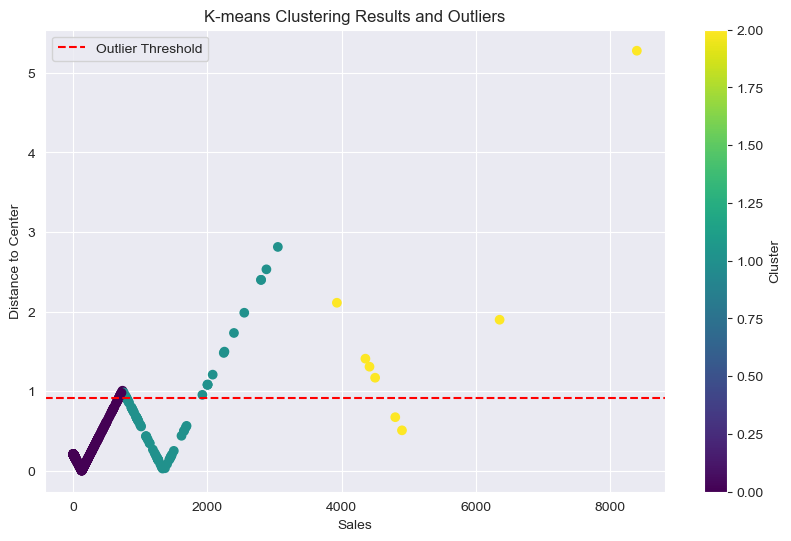

In [206]:
#5 Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(df_sales_sample_kmeans['Sales'], df_sales_sample_kmeans['Distance'], c=df_sales_sample_kmeans['Cluster'], cmap='viridis', marker='o')
plt.axhline(y=threshold, color='r', linestyle='--', label='Outlier Threshold')
plt.title('K-means Clustering Results and Outliers')
plt.xlabel('Sales')
plt.ylabel('Distance to Center')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


2.6 Outlier Treatment 

2.7 delete outliers with z-score

In [207]:
# Identify outliers using Z-score
# spin up sample
df_remove_outlier_sample = df_numeric_cust_features['Sales'].sample(n=1000, random_state=42)
print(df_remove_outlier_sample.shape)

(1000,)


Removed 75 outliers using Z-score method.


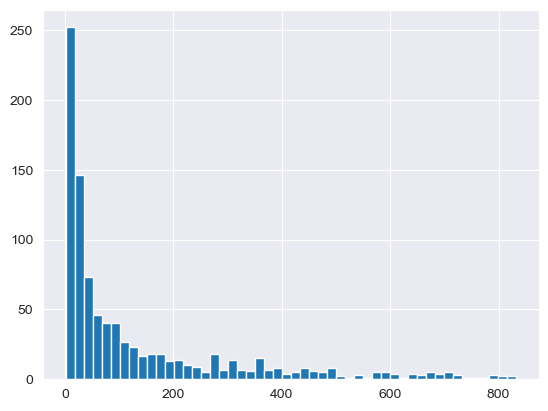

In [208]:
# Identify outliers using Z-score
z_scores = np.abs(stats.zscore(df_remove_outlier_sample))
threshold = 1
outliers = df_remove_outlier_sample[z_scores > threshold]

# Remove outliers
df_cleaned = df_remove_outlier_sample[z_scores <= threshold]
print(f"Removed {len(outliers)} outliers using Z-score method.")
plt.hist(df_cleaned, bins=50)
plt.show()

2.8 delete outlier manually


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


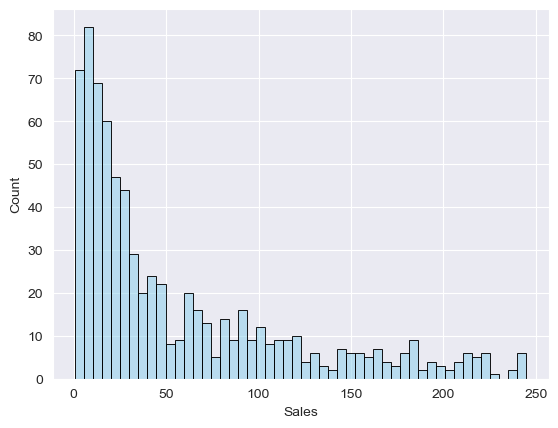

In [209]:
# set limit of sales €246 and replot the half distribution curve.
sample_no_outlier= df_numeric_data_sample[df_numeric_data_sample['Sales'] <= 246]
sns.histplot(sample_no_outlier['Sales'], color='skyblue', edgecolor='black', alpha=0.5, bins=50)
plt.show()


2.8.1 The probability highlights just deleting some outliers does not really 100% solve the problem

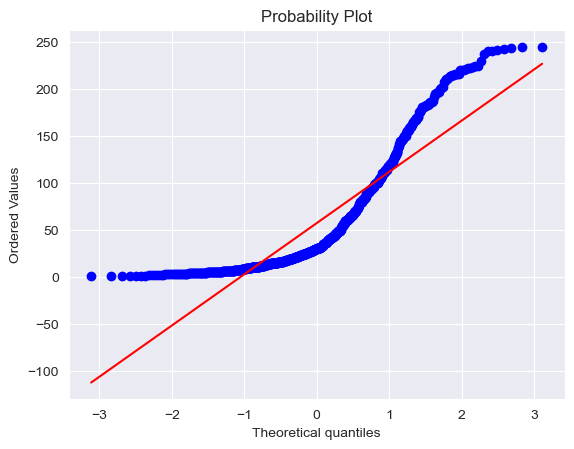

In [210]:
# create probplot using manually deleted sales data.
fig = plt.figure()
kill_outliers = pd.DataFrame()
kill_outliers = df_numeric_data_sample[df_numeric_data_sample['Sales'] <= 246]
res = stats.probplot(kill_outliers['Sales'], plot=plt)
plt.show()

2.9 Outlier treatment: Log transformation (normalization) 

In [211]:
"""
* will reduce impact of outliers 
* will make data more normally distributed
* model is still skewed.
* When i use a sample of 1000 the results where inconclusive, however when i applied the population of all sales data the impact is more pronounced and measurable. Therefore i used this approach as justification.
"""

# apply log trans to population to transform.
df_numeric_data_sample_logchange = pd.DataFrame()
df_numeric_data_sample_logchange['Sales'] = np.log1p(df_numeric_cust_features['Sales'])
print(df_numeric_data_sample_logchange.shape)

(9994, 1)


2.9.1 The log transformation was a major success and managed to compress the range.

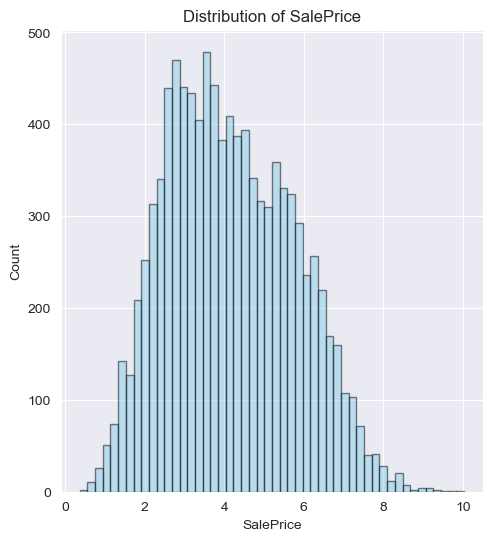

In [212]:
# plot log transformed sales using histogram.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_numeric_data_sample_logchange['Sales'], bins=50, color='skyblue', alpha=0.5, edgecolor='black')
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.show()

2.9.2  probability curve is aligned.

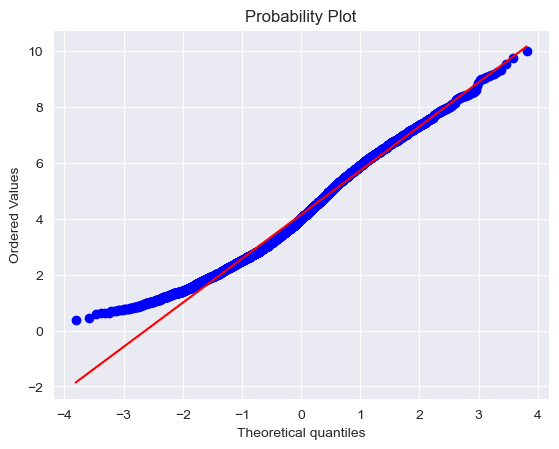

In [213]:
fig = plt.figure()
res = stats.probplot(df_numeric_data_sample_logchange['Sales'], plot=plt)
plt.show()

2.10 Outlier treatment: Box_cox (normalization)

It is intriguing that the results from the log transformation and box_cox are nearly identical in normalsing the reults.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


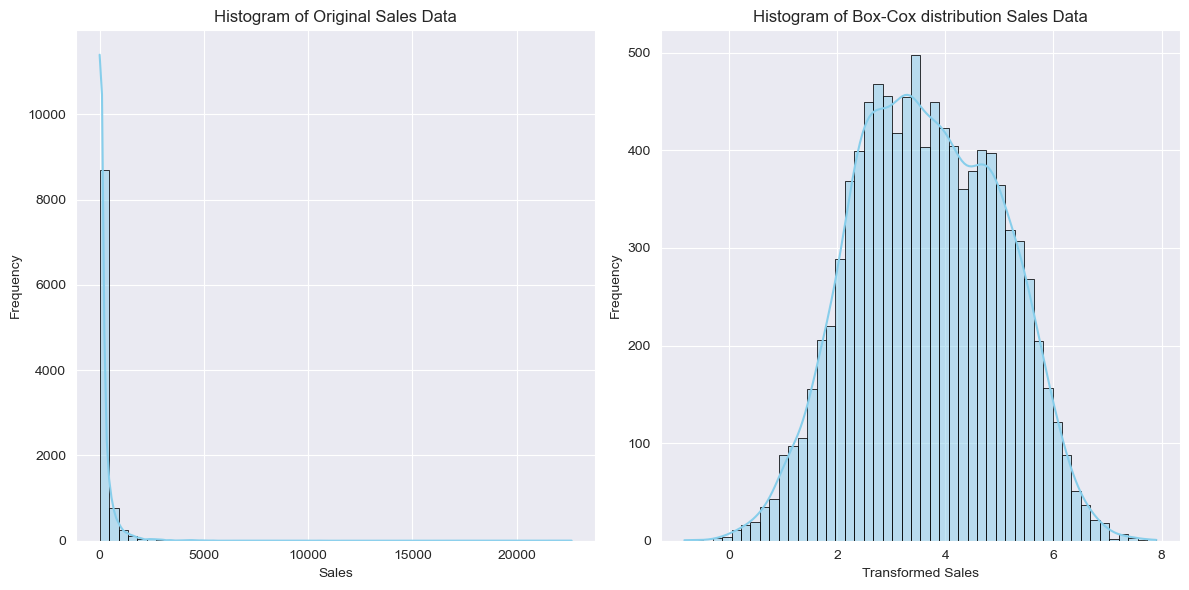

In [214]:
# we use the full population as we had different results with small sample experiments.
# note: both normalization box cox and log transformation resulted in near identical results with slightly different ranges.

transformed_sales, lambda_value = stats.boxcox(df_numeric_cust_features['Sales'] + 1e-5)

# plot the original sales data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_numeric_cust_features['Sales'],  bins=50, color='skyblue', alpha=0.5, edgecolor='black', kde=True)
plt.title('Histogram of Original Sales Data')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Plot Box-Cox transformed 'Sales' data
plt.subplot(1, 2, 2)
sns.histplot(transformed_sales, bins=50, color='skyblue', alpha=0.5, edgecolor='black', kde=True)
plt.title('Histogram of Box-Cox distribution Sales Data')
plt.xlabel('Transformed Sales')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

2.10.1 The box_cox method was a major success with outlier mitigation when one considers the probability plot.

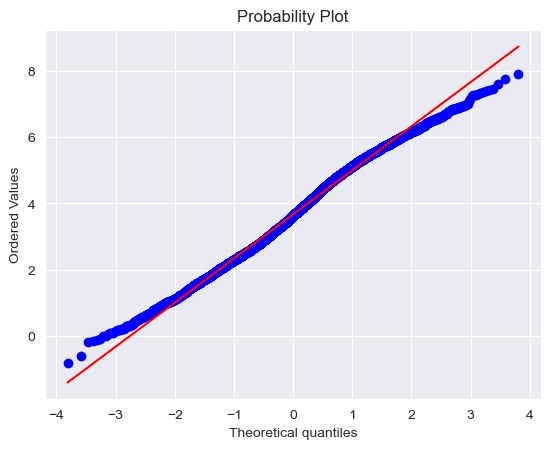

In [215]:
#plot using transformed sales post box cox
fig = plt.figure()
res = stats.probplot(transformed_sales, plot=plt)
plt.show()

In [216]:
# 2.11 Exploratory analysis "after" the log transformation and box cox
 
"""Note: the after affect of the log transformation & box cox: the mean, median, standard deviation, skew and kurtosis etc are recalculated with positive results e.g. mean and median complement each other, skew is eliminated which reinforces the success. This is just saying we solved the outlier problem"""

'Note: the after affect of the log transformation & box cox: the mean, median, standard deviation, skew and kurtosis are recalculated with positive results e.g. mean and median complement each other, skew is eliminated (o) which reinforce the success. This is just saying we solved the outlier problem'

In [217]:
print(df_numeric_data_sample_logchange.shape)

(9994, 1)


In [218]:
df_numeric_data_sample_logchange['Sales'].mean()

4.156147495214837

In [219]:
df_numeric_data_sample_logchange['Sales'].median()

4.01620280809951

In [220]:
df_numeric_data_sample_logchange['Sales'].mode()

0    2.636196
Name: Sales, dtype: float64

In [221]:
df_numeric_data_sample_logchange['Sales'].skew()

0.2817714600736718

In [222]:
df_numeric_data_sample_logchange['Sales'].kurtosis()

-0.5831972602052575

In [223]:
df_numeric_data_sample_logchange['Sales'].std()

1.5898135903416855

In [224]:
df_numeric_data_sample_logchange['Sales'].var()

2.5275072520351207

3.0 Normalization and Scaling

Normalisation we change the shape of distribution.
Scaling we change the range of the data.

3.1 Min Max normalization 

In [225]:
# we fit the min max scaler and do a before and after with the scaler. we can see how the features are on the same scale after.
"""
 normalisation of numerical features on a more even and equal footing and same scale. 
"""
# initiate scaler and fit
min_max_scaler = MinMaxScaler()
df_numeric_cust_features_scaled = min_max_scaler.fit_transform(df_numeric_cust_features)

df_numeric_cust_features_scaled = pd.DataFrame(df_numeric_cust_features_scaled, columns=df_numeric_cust_features.columns)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Sales'),
  Text(1, 0, 'Quantity'),
  Text(2, 0, 'Discount'),
  Text(3, 0, 'Profit')])

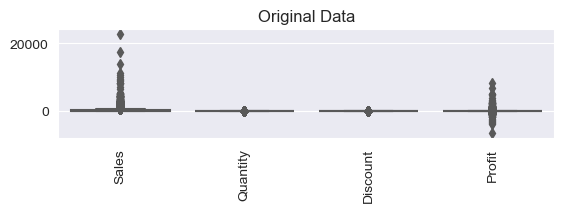

In [226]:
# A. original data boxplot experiment
plt.subplot(3, 1, 1)
sns.boxplot(data=df_numeric_cust_features, palette="Set2")
plt.title('Original Data')
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Sales'),
  Text(1, 0, 'Quantity'),
  Text(2, 0, 'Discount'),
  Text(3, 0, 'Profit')])

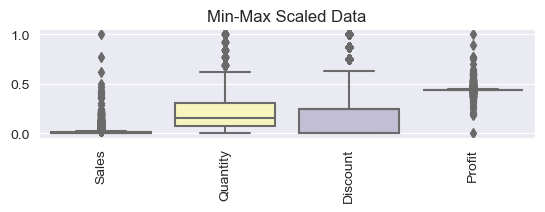

In [227]:
# B. Min-Max Scaled with box plot experiment
plt.subplot(3, 1, 1)
sns.boxplot(data=df_numeric_cust_features_scaled, palette="Set3")
plt.title('Min-Max Scaled Data')
plt.xticks(rotation=90)

3.2 Z-Score

In [228]:
# applying z-score normalization
df_zscore_scaled = df_numeric_cust_features.apply(stats.zscore)

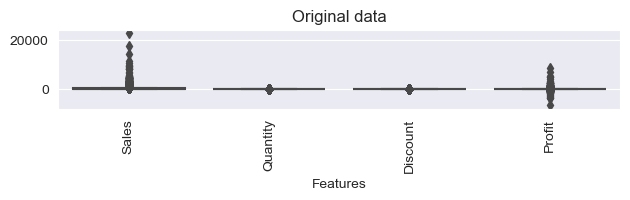

In [229]:
# plot with original data
plt.subplot(3, 1, 1)
sns.boxplot(data=df_numeric_cust_features, palette="Set1")
plt.title('Original data')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.tight_layout()
plt.show()

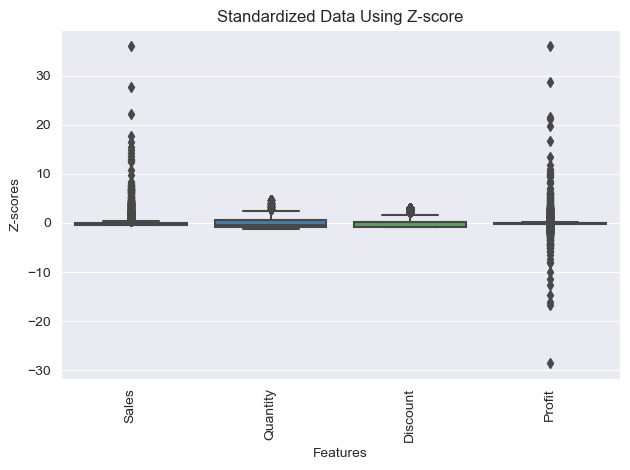

In [230]:
# plot with z-score normalized data
sns.boxplot(data=df_zscore_scaled, palette="Set1")
plt.title('Standardized Data Using Z-score')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Z-scores')
plt.tight_layout()
plt.show()

3.3 Standard Scaler: Standardization. 

In [231]:
# initiate standard scaler
scaler_numeric = StandardScaler()

In [232]:
# standardize numeric sample
df_scaled_numeric_features = pd.DataFrame(scaler_numeric.fit_transform(df_numeric_data_sample[['Sales','Quantity','Profit','Discount']]),columns=['Sales','Quantity','Profit','Discount'])

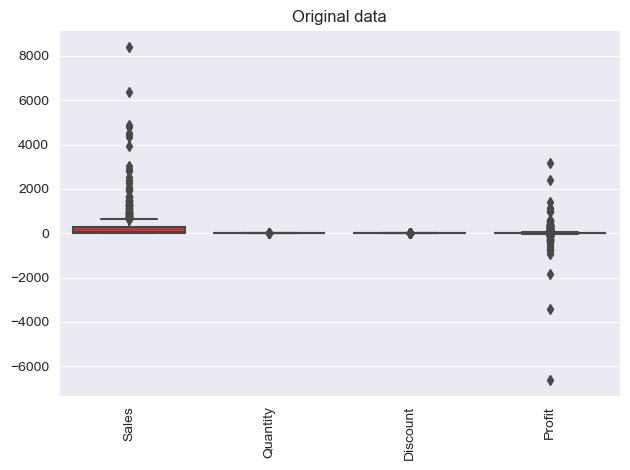

In [233]:
# plot with unscaled data sample
sns.boxplot(data=df_numeric_data_sample, palette="Set1")
plt.title('Original data')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

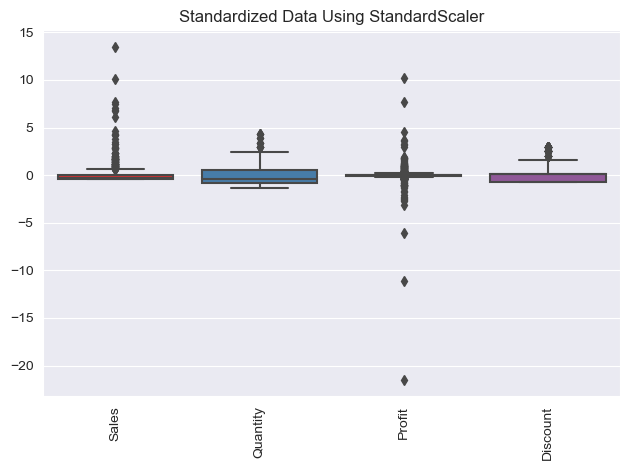

In [234]:
# plot with standardize sample data
sns.boxplot(data=df_scaled_numeric_features, palette="Set1")
plt.title('Standardized Data Using StandardScaler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

4.0 Grouping of data:

4.1 Data aggregation and frequency distributions around product, customer and sales

In [235]:
# create a dataframe for numeric, product and customer
df_product = df_categorical_cust_info.drop(['Order Date','Ship Date','Order Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Order ID','Row ID'], axis=1 )
df_customer = df_categorical_cust_info.drop(['Product Name', 'Product ID','Sub-Category','Category','Ship Mode','Ship Date','Row ID','Order Date'], axis=1)
df_numeric_data_sample.info()
df_product.info()
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 3125 to 8690
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sales     1000 non-null   float64
 1   Quantity  1000 non-null   float64
 2   Discount  1000 non-null   float64
 3   Profit    1000 non-null   float64
dtypes: float64(4)
memory usage: 39.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product ID    9992 non-null   object
 1   Category      9992 non-null   object
 2   Sub-Category  9990 non-null   object
 3   Product Name  9991 non-null   object
dtypes: object(4)
memory usage: 312.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order ID       9993 non-

4.2 Frequency distribution and aggregations: 

4.2.1. Time based frequency distribution: What are the number of sales per year? 

In [236]:
# clean data replace invalid date value
df_categorical_cust_info['Order Date'] = df_categorical_cust_info['Order Date'].replace({'$April': '04/11/2015'})


In [237]:
# add sales column
df_categorical_cust_info['Sales'] = df_numeric_cust_features['Sales']

In [238]:
# convert 'Order Date' column to datetime objects
df_categorical_cust_info['Order Date'] = pd.to_datetime(df_categorical_cust_info['Order Date'], dayfirst=True, errors='coerce')
print(df_categorical_cust_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9993 non-null   object        
 2   Order Date     9992 non-null   datetime64[ns]
 3   Ship Date      9991 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9991 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9990 non-null   object        
 11  Postal Code    9991 non-null   object        
 12  Region         9991 non-null   object        
 13  Product ID     9992 non-null   object        
 14  Category       9992 non-null   object        
 15  Sub-Category   9990 n

In [239]:
# create date range for bins 
bins = pd.date_range(start='2014-01-01', end='2018-01-01', freq='YS')
labels = [str(year.year) for year in bins[:-1]]
print(labels)

['2014', '2015', '2016', '2017']


In [240]:
# categorize the dates into bins
df_categorical_cust_info['Year_Bin'] = pd.cut(df_categorical_cust_info['Order Date'], bins=bins, labels=labels)

In [241]:
# group by these bins and sum the 'Sales' values
sales_by_years_bin = df_categorical_cust_info.groupby('Year_Bin', observed=False)['Sales'].sum().reset_index()

In [242]:
sales_by_years_bin.sort_values(by='Year_Bin', ascending=True, inplace=True)
# verify the grouped sales data
print("Sales by Year Bin:")
print(sales_by_years_bin)
print("Gross sales for period")
print(sales_by_years_bin.Sales.sum())

Sales by Year Bin:
  Year_Bin         Sales
0     2014  483605.19588
1     2015  469869.43700
2     2016  610687.42600
3     2017  731733.42720
Gross sales for period
2295895.486079676


4.2.2 Frequency distribution: how frequently each product category is purchased by each customer type

In [243]:
# a simple cross-tabulation of segment and sub-category to determine what each customer type has brought from each category.
df_cat_cust_products = pd.crosstab(df_categorical_data_sample['Segment'], df_categorical_data_sample['Sub-Category'])
print(df_cat_cust_products)

Sub-Category  Accessories  Appliances  Art  Binders  Bookcases  Chairs  \
Segment                                                                  
Consumer               32          24   44       69         16      42   
Corporate              22          18   30       47         12      20   
Home Office            11          11   23       27          2      18   

Sub-Category  Copiers  Envelopes  Fasteners  Furnishings  Labels  Machines  \
Segment                                                                      
Consumer            4         11          9           45      18         6   
Corporate           3         10          4           25       9         3   
Home Office         1          4          7           15       7         1   

Sub-Category  Paper  Phones  Storage  Supplies  Tables  
Segment                                                 
Consumer         70      39       44        12      18  
Corporate        40      32       19         5      11  
Home Offic

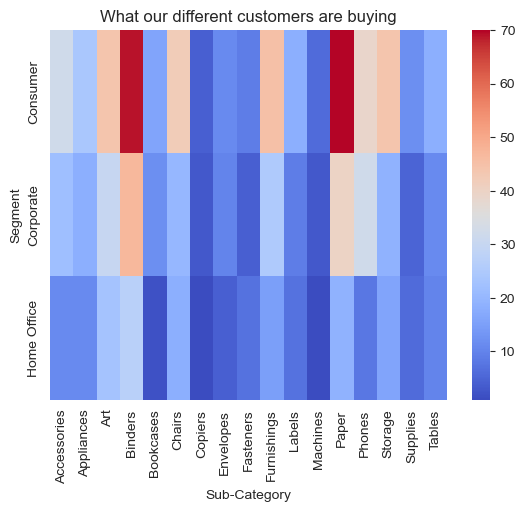

In [244]:
# model cross tabulation in a simple heatmap.
sns.heatmap(df_cat_cust_products, cmap='coolwarm')
plt.title("What our different customers are buying")
plt.show()

4.2.3 Frequency distribution: What is the frequency of orders from each state?

In [245]:
# we count each occurrence of state from a sample and place results in order in a new order count column.
sample_state_order_count = df_categorical_data_sample.groupby('State').size().reset_index(name='Order Count')
sample_state_order_count_sorted = sample_state_order_count.sort_values(by='Order Count',ascending=False)
print(sample_state_order_count_sorted)

             State  Order Count
3       California          191
38           Texas          123
28        New York          111
33    Pennsylvania           66
30            Ohio           49
41      Washington           45
10        Illinois           38
8          Georgia           29
7          Florida           27
37       Tennessee           26
1          Arizona           25
29  North Carolina           24
40        Virginia           23
4         Colorado           22
18        Michigan           21
11         Indiana           17
17   Massachusetts           15
43       Wisconsin           12
14        Kentucky           12
32          Oregon           10
16        Maryland           10
26      New Jersey           10
6         Delaware            8
19       Minnesota            8
2         Arkansas            8
21        Missouri            7
5      Connecticut            7
34    Rhode Island            6
35  South Carolina            6
24          Nevada            6
23      

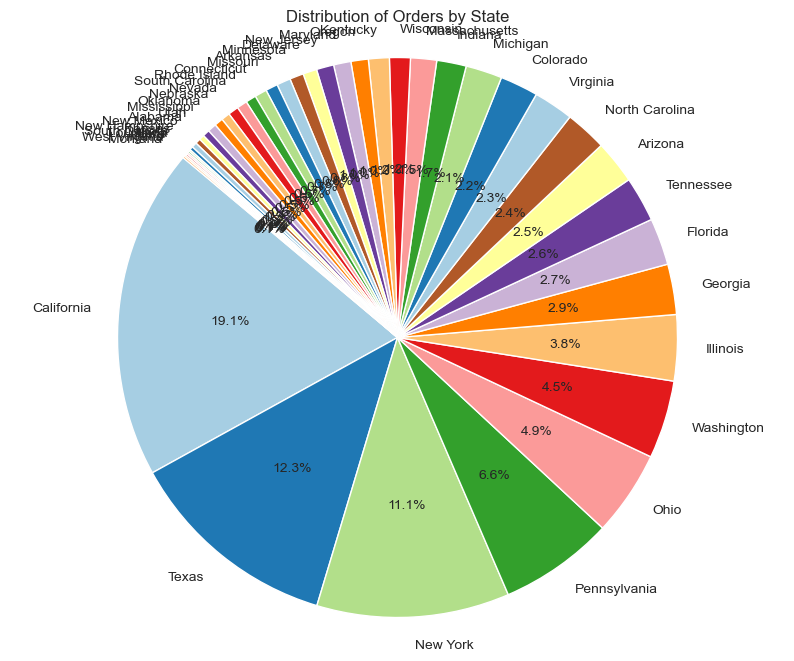

In [246]:
# we visualize result in a pie chart showing % of sales in each state.
plt.figure(figsize=(10, 8))
plt.pie(sample_state_order_count_sorted['Order Count'], labels=sample_state_order_count_sorted['State'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Orders by State')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

4.2.4 Frequency distributions: what is the most popular delivery method?

In [247]:
# make a new sample
df_categorical_cust_subset = df_categorical_cust_info.sample(n=1000, random_state=42)
print(df_categorical_cust_subset.shape)

(1000, 19)


In [248]:
delivery_mode_counts = df_categorical_cust_subset['Ship Mode'].value_counts().reset_index()
print(delivery_mode_counts)

        Ship Mode  count
0  Standard Class    615
1    Second Class    187
2     First Class    143
3        Same Day     55


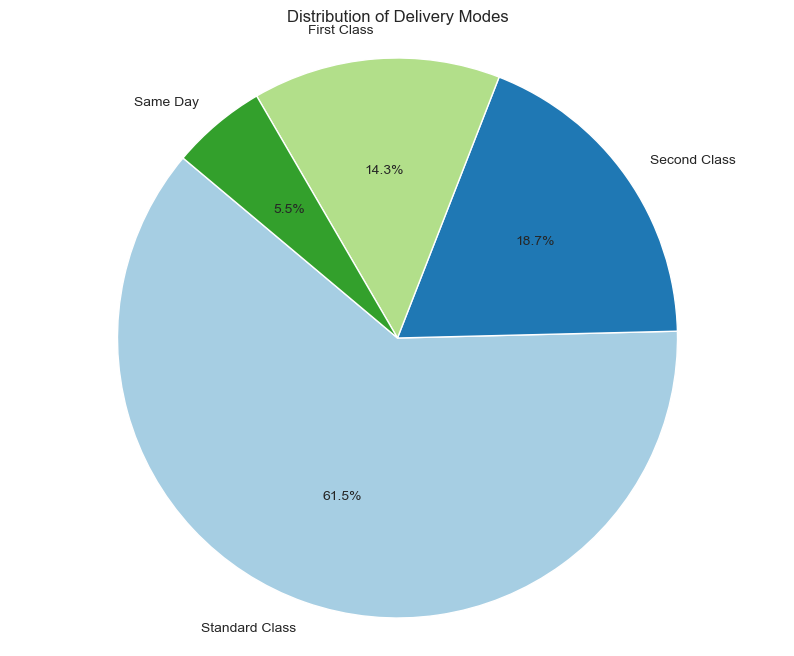

In [249]:
# create the pie chart for visualization
plt.figure(figsize=(10, 8))
plt.pie(delivery_mode_counts['count'], labels=delivery_mode_counts['Ship Mode'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
# add title and make aspect ratio equal to ensure circular pie chart
plt.title('Distribution of Delivery Modes')
plt.axis('equal')
# display the chart
plt.show()

4.2.5 Frequency distribution: What is the frequency of orders shipped each date?


In [250]:
# the frequency of orders per day over time
orders_shipped_on_date = df_categorical_cust_subset.groupby("Ship Date")["Order Date"].nunique()
orders_shipped_on_date = orders_shipped_on_date.sort_values(ascending=False)
print(orders_shipped_on_date.head())
print(orders_shipped_on_date.tail())
print(df_categorical_cust_subset.shape)

Ship Date
09/06/2017    4
09/01/2017    4
27/04/2017    4
19/09/2014    4
16/11/2017    3
Name: Order Date, dtype: int64
Ship Date
12/02/2015    1
12/02/2014    1
12/01/2016    1
11/12/2016    1
31/12/2017    1
Name: Order Date, dtype: int64
(1000, 19)


4.2.6 Frequency distribution: How many orders are associated with each customer?

In [251]:
# make sample for experiment
df_sample_number_of_orders = df_categorical_cust_info.sample(n=1000, random_state=42)

number_of_orders = df_sample_number_of_orders.groupby(['Customer ID','Customer Name'])['Order ID'].count()
number_of_orders_sorted = number_of_orders.sort_values(ascending=False)
print(number_of_orders_sorted.head())
print(number_of_orders_sorted.tail())

Customer ID  Customer Name  
FM-14290     Frank Merwin       8
SE-20110     Sanjit Engle       8
BM-11650     Brian Moss         7
DK-12835     Damala Kotsonis    6
SV-20365     Seth Vernon        6
Name: Order ID, dtype: int64
Customer ID  Customer Name   
KB-16405     Katrina Bavinger    1
KB-16315     Karl Braun          1
JW-16075     Julia West          1
JS-15880     John Stevenson      1
JS-15595     Jill Stevenson      1
Name: Order ID, dtype: int64


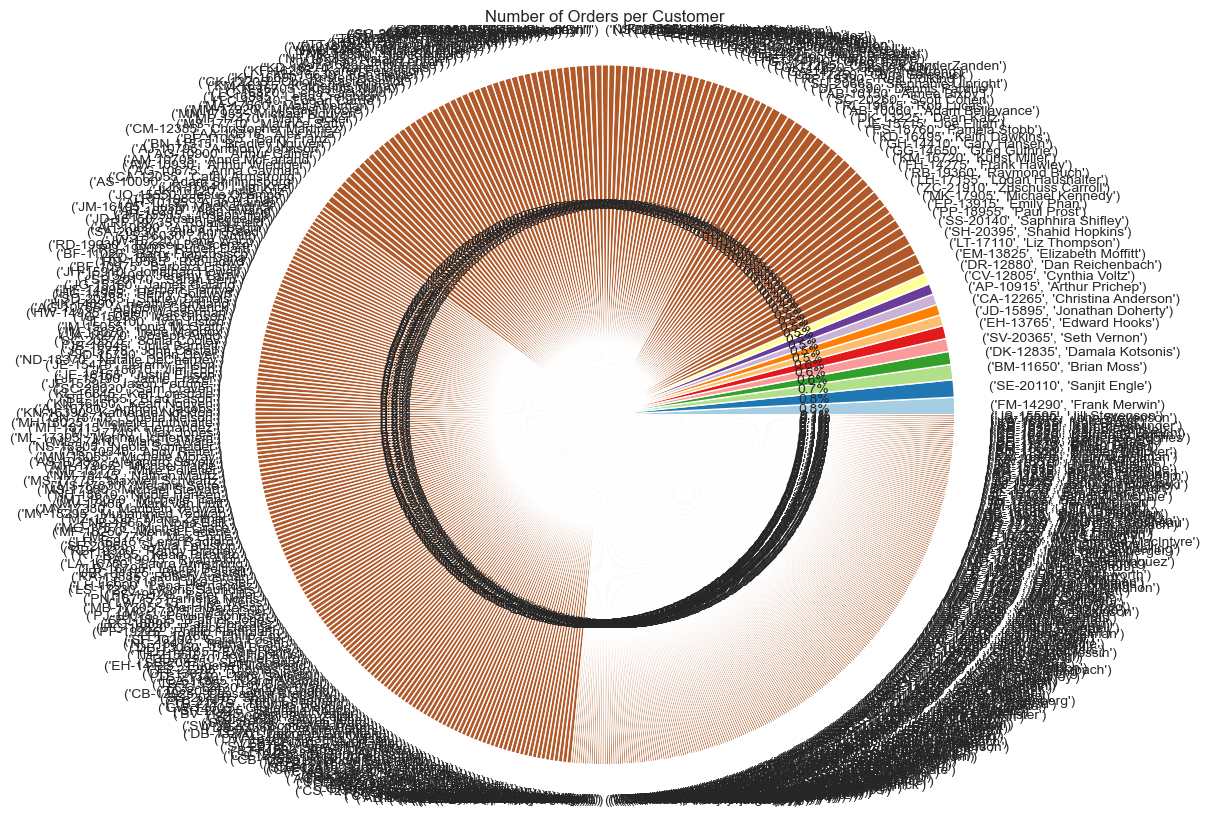

In [252]:
# plotting a pie chart customers to orders made
plt.figure(figsize=(12, 10))
colors = plt.cm.Paired(range(len(number_of_orders_sorted)))  # Generate colors
plt.pie(number_of_orders_sorted, labels=number_of_orders_sorted.index, autopct='%1.1f%%', colors=colors)
plt.title('Number of Orders per Customer')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

4.2.7 Frequency distribution: The frequency of shipping mode by state.

In [253]:
contingency_table = pd.crosstab(df_categorical_cust_info['State'], df_categorical_cust_info['Ship Mode'])
print(contingency_table)

Ship Mode             First Class  Same Day  Second Class  Standard Class
State                                                                    
Alabama                         9         1            18              33
Arizona                        41        16            27             139
Arkansas                       10         2            10              38
California                    322       119           395            1163
Colorado                       44         6            33              99
Connecticut                    19        10            11              42
Delaware                       18         2            16              60
District of Columbia            0         0             3               7
Florida                        54        28            67             234
Georgia                        22        15            31             116
Idaho                           4         0             4              13
Illinois                       67     

4.3 Data Aggregation

4.3.1 Calculating the number of units sold per year

In [254]:
# create new sample
df_quantity_sold_sample = df_categorical_cust_info.sample(n=1000, random_state=42)

In [255]:
# convert order date to datetime
df_quantity_sold_sample['Order Date'] = pd.to_datetime(df_categorical_cust_info['Order Date'], dayfirst=True, errors='coerce')

In [256]:
#extract year from order date
df_quantity_sold_sample['Year'] = df_categorical_cust_info['Order Date'].dt.year
#add column quantity
df_quantity_sold_sample['Quantity'] = df_numeric_data_sample['Quantity']
#create bins and labels
bin_3 = pd.date_range(start='2014-01-01', end='2018-01-01', freq='YS').year
labels_3 = [str(year) for year in bin_3[:-1]]
df_quantity_sold_sample['Year'] = pd.cut(df_quantity_sold_sample['Year'], bins=bin_3, labels=labels_3, right=False)
#aggregate data by year
aggregate_data_by_year = df_quantity_sold_sample.groupby('Year')['Quantity'].sum().reset_index()
print(aggregate_data_by_year)

   Year  Quantity
0  2014     771.0
1  2015     824.0
2  2016    1041.0
3  2017    1189.0


/var/folders/fp/666jg5k13vv5g55jp6zsvysc0000gn/T/ipykernel_88593/1040506996.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregate_data_by_year = df_quantity_sold_sample.groupby('Year')['Quantity'].sum().reset_index()


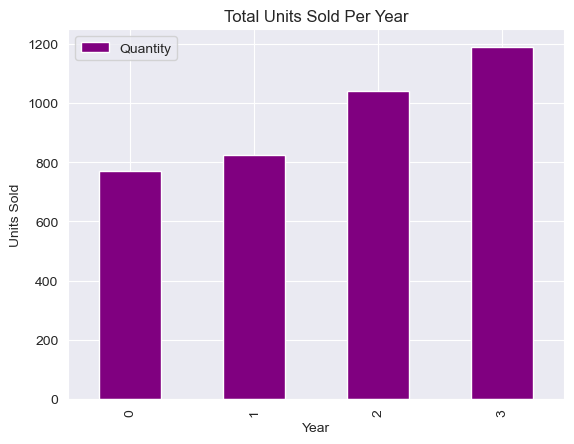

In [257]:
#visualize the aggregated data
aggregate_data_by_year.plot(kind='bar', color='purple')
plt.title('Total Units Sold Per Year')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.show()

4.2.6 What customer has spent the most money? 

In [258]:
# we used the population for this frequency calculation as there is a given difference between a small sample vs the population. To get a realistic view of the customers i had to used the population. 
cus_order_most_money = df_categorical_cust_info.groupby("Customer Name")['Sales'].sum().reset_index()
cus_order_most_money_in_order = cus_order_most_money.sort_values(by='Sales', ascending=False)
print(cus_order_most_money_in_order.head())
print(cus_order_most_money_in_order.tail())

     Customer Name      Sales
687    Sean Miller  25043.050
731   Tamara Chand  19052.218
623   Raymond Buch  15117.339
758   Tom Ashbrook  14595.620
7    Adrian Barton  14473.571
       Customer Name   Sales
657       Roy Skaria  22.328
546  Mitch Gastineau  16.739
124     Carl Jackson  16.520
456     Lela Donovan   5.304
738    Thais Sissman   4.833


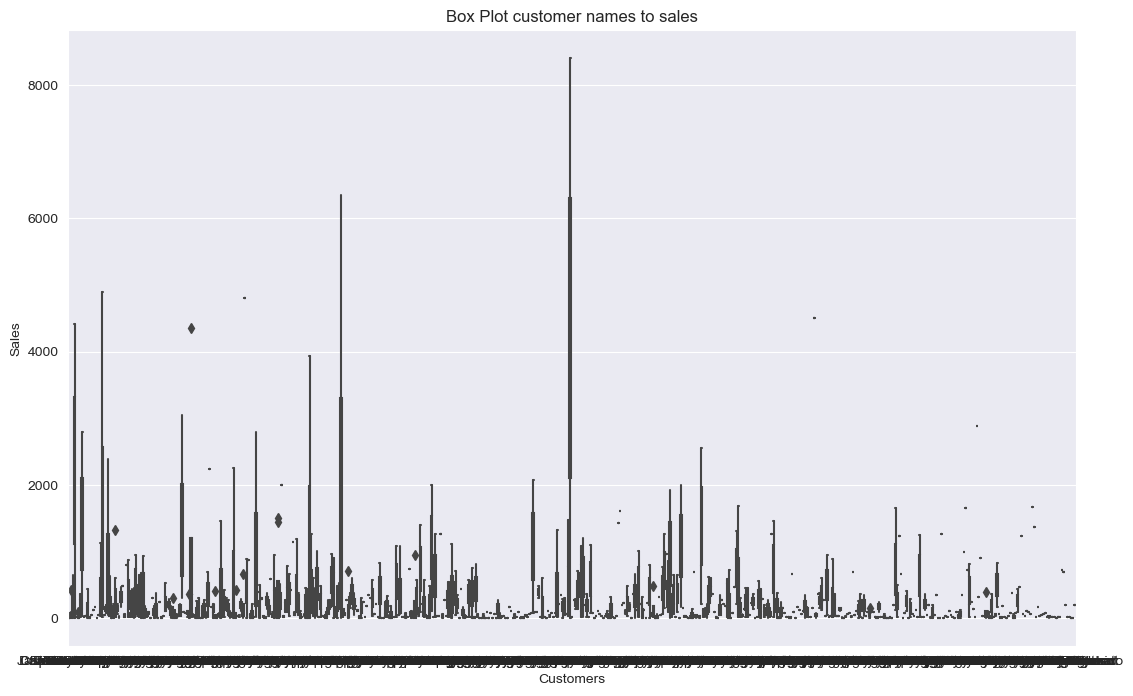

In [259]:
# unfortunately the customer names overwrite each other on the x axis
plt.figure(figsize=(13, 8))
sns.boxplot(x=df_categorical_data_sample['Customer Name'], y=df_numeric_data_sample['Sales'])
plt.title('Box Plot customer names to sales')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()


5.0 Handling missing values

In [260]:
# the actual coding is spread across the code base and referenced by section in the below text summary, so the reviewer can see the actual methods that were used in the code base and verify this.
"""

1. For finding missing values for categorical features and missing values in numeric features i used the following in section 0.1 and 0.6:
*   isnull(), isna(),
*   df_categorical_cust_info.isnull().sum()
*   df_numeric_cust_features.isna().sum()
2. To determine the number of missing values and understand the scope I used:
*   .sum()
3. In handling missing values and NaNs as per Task 1 section (0.5, 0.7)  I used the Random Forest Imputation, a machine learning model RandomForestRegressor to predict and impute missing numeric values and NaNs across the numeric feature set e.g. Sales, Profit, Quantity and Discount.
*   df_numeric_cust_features['Quantity'] = imputer.fit_transform(df_numeric_cust_features[['Quantity']])
4. There is also the option to use something more simple like the mean() to replace missing numeric values in features:
*   df.fillna(df.mean())
*   df.fillna(df.median())
5. For missing categorical values section (0.9) i used  fillna()with mode() to substitute with the most frequently occurring term for example
*   df_categorical_cust_info['Country'].fillna(df_categorical_cust_info['Country'].mode()[0], inplace=True)
6. For Cleaning as per task 1 sections (0.4, 0.6, 0.7,0.9 and 4.2.1): I use replace() to map inconsistencies and incorrect entries to standardize:
*   “two” and “three” instead of “2” and “3”.
*   “$April” instead of 12/05/2014
*    “56” instead of United States
Removal of random speech marks values in features:
*   df_numeric_cust_features['Profit'] = df_numeric_cust_features['Profit'].apply(lambda x: str(x).replace('"', '').strip())
checking for duplicates i used
*   duplicates = df_customer_order_info.duplicated()

7. Cleaning also included handling incorrect data types as per task 1 section (0.7,0.9):
*   type conversions to enable feature engineering with numeric feature data types df_numeric_cust_features['Quantity'].astype(float)
* type conversions to enable interrogation of date sensitive features df_categorical_cust_info['Order Date'] = pd.to_datetime(df_categorical_cust_info['Order Date'], dayfirst=True, errors='coerce')
8. for duplicates eliminate to keep data clean section (0.1)
df.duplicated()
9. for totally irrelevant features to keep data clean
df.drop(['column_to_remove'], axis=1)
10. For standardization to protect the integrity (section 0.9) of the data set I also used replace()
df_categorical_cust_info['Country'].replace("US","United States", inplace=True)
 """

'\n1. For finding missing values for categorical features and missing values in numeric features i used the following:\n* isnull(), isna(),\n* df_categorical_cust_info.isnull().sum()\n* df_numeric_cust_features.isna().sum()\n\n2. To determine the number of missing values and understand the scope I used:\n* .sum()\n3. In handling missing values and NaNs as per Task 1 section (0.5, 0.7)  I used the Random Forest Imputation, a machine learning model RandomForestRegressor to predict and impute missing numeric values and NaNs across the numeric feature set e.g. Sales, Profit, Quantity and Discount.\n\n* df_numeric_cust_features[\'Quantity\'] = imputer.fit_transform(df_numeric_cust_features[[\'Quantity\']])\n\n4. There are also the option to use something more simple like the mean() to replace missing numeric values in features:\n\ndf.fillna(df.mean())\ndf.fillna(df.median()) \n\n5. For missing categorical values section (0.9) i used  fillna()with mode() to substitute with the most frequentl

6.0 The correlation

6.1 Correlation matrix

In [261]:
# calculate correlation using corr() function and interpret with text and a heatmap
correlation = df_numeric_cust_features.corr()
print(correlation)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200642 -0.028159  0.488362
Quantity  0.200642  1.000000  0.007778  0.071662
Discount -0.028159  0.007778  1.000000 -0.217615
Profit    0.488362  0.071662 -0.217615  1.000000


6.2 Correlation matrix

In [262]:
# describe features that are related and the nature of that relationship giving just two examples
"""

6.1 Narrative: As per Kane, Frank 2017

1. Sales and Quantity
Correlation Coefficient: 0.200642
Interpretation: This is a weak positive correlation. There is a slight tendency for Sales to increase with Quantity, but the relationship is not very strong

2. Discount and Profit
Correlation Coefficient: -0.217615
Interpretation: There is a weak negative correlation between Discount and Profit. Higher discounts tend to be associated with lower profits, indicating that giving discounts might reduce profitability, but the relationship is not very strong """

'\n\n6.1 As per Kane, Frank 2017 \n1. Sales and Quantity\nCorrelation Coefficient: 0.200642\nInterpretation: This is a weak positive correlation. There is a slight tendency for Sales to increase with Quantity, but the relationship is not very strong\n\n2. Sales and Discount\nCorrelation Coefficient: -0.028159\nInterpretation: This is an extremely weak negative correlation. Sales and Discount are almost uncorrelated, meaning changes in the discount rate have little to no effect on sales.\n\n3. Sales and Profit\nCorrelation Coefficient: 0.488362\nInterpretation: This is a moderate positive correlation. As Sales increase, Profit tends to increase as well. This suggests a reasonably strong relationship where higher sales are associated with higher profits.\n\n4. Quantity and Discount\nCorrelation Coefficient: 0.007778\nInterpretation: This is an extremely weak positive correlation. Quantity and Discount are almost uncorrelated, indicating that the discount rate has almost no effect on the 

6.3 correlation matrix heatmap

<Axes: >

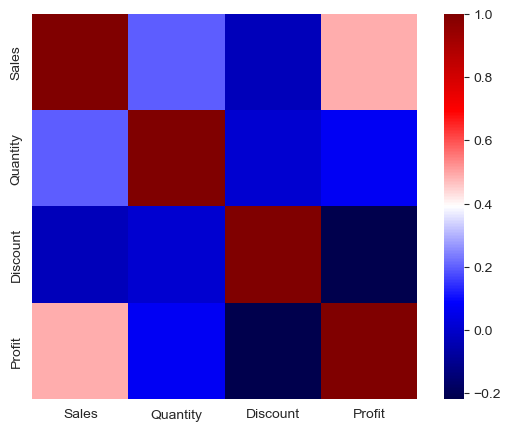

In [263]:
"""
We can see there is just one negative feature which is discount, which will always go in the opposite direction of other positive features e.g. sales, profit and quantity depending on the strength of the correlation.
"""
# pass correlation to subplot to visualize the correlation between the numeric features.
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(correlation, square=True, cmap='seismic')

7.0 Univariate Visualizations

See extensive visualizations in section task 2,  2.1, 2.2 .. 3, 4,5 and 6 which make use of substantial visualizations. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


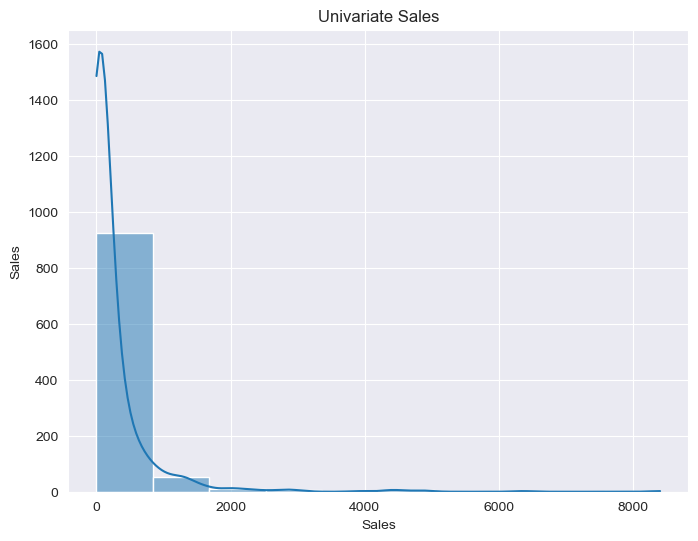

In [269]:
df_sample_for_visualization = df_numeric_cust_features.sample(n=1000, random_state=42)
plt.figure(figsize=(8, 6))
sns.histplot(df_sample_for_visualization['Sales'], bins=10, kde=True)
plt.title('Univariate Sales')
plt.ylabel('Sales')
plt.show()

/var/folders/fp/666jg5k13vv5g55jp6zsvysc0000gn/T/ipykernel_88593/3427412024.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_sample_for_visualization['Sales'], shade=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


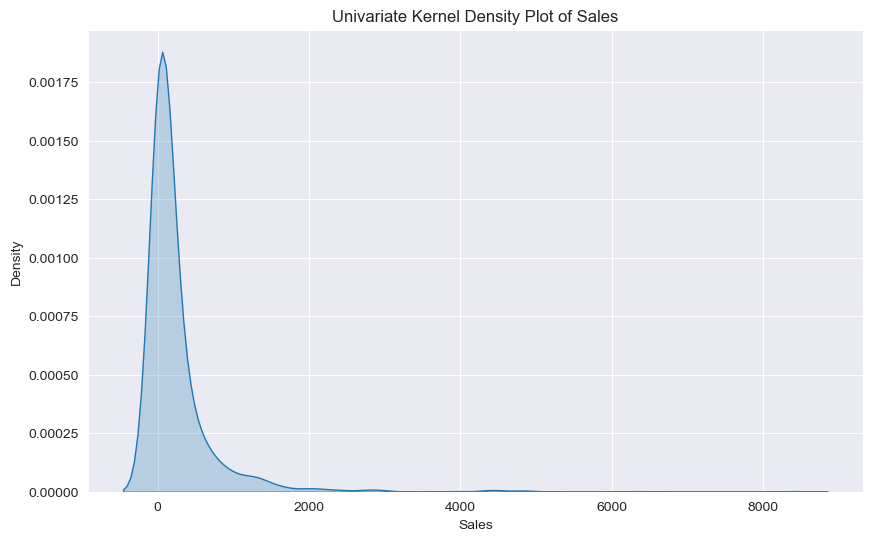

In [270]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_sample_for_visualization['Sales'], shade=True)
plt.title('Univariate Kernel Density Plot of Sales')
plt.xlabel('Sales')
plt.show()

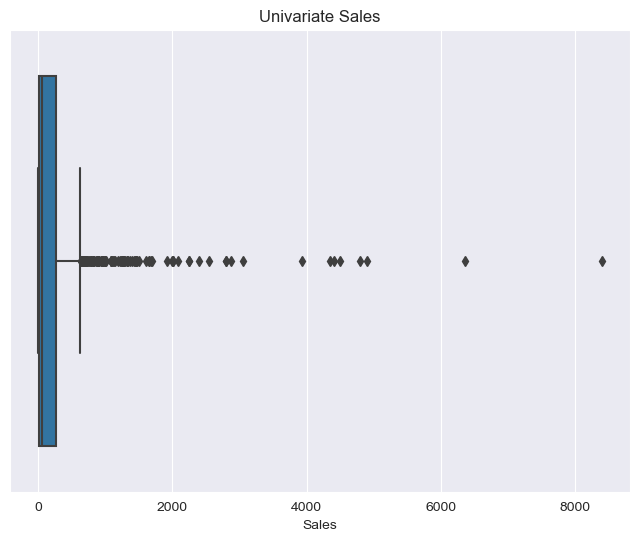

In [271]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_sample_for_visualization['Sales'])
plt.title('Univariate Sales')
plt.show()

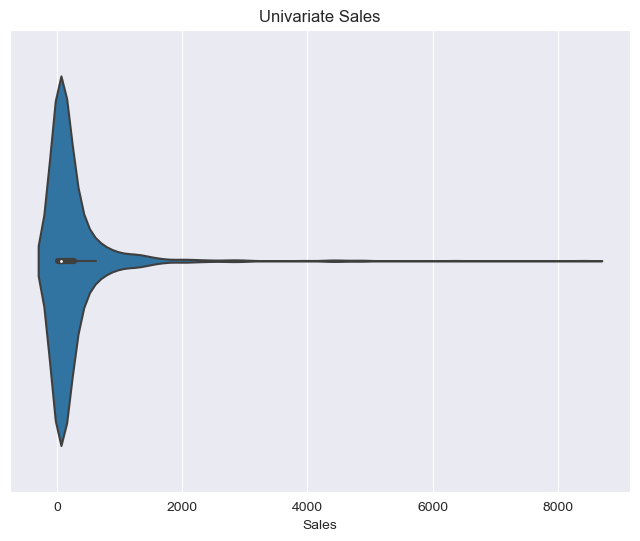

In [272]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=df_sample_for_visualization['Sales'])
plt.title('Univariate Sales')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


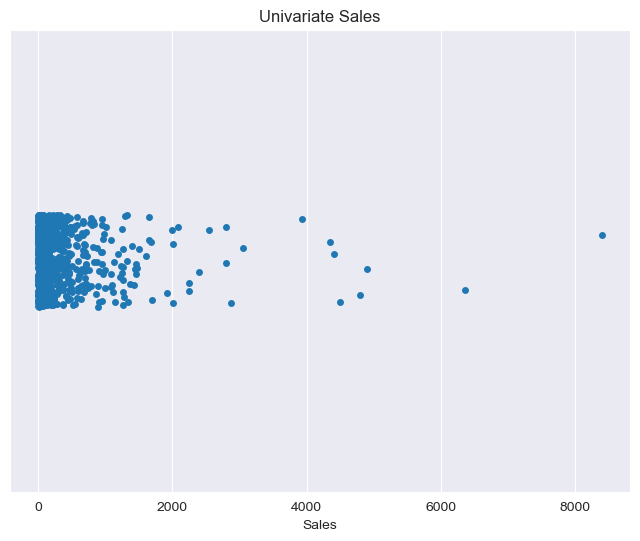

In [273]:
plt.figure(figsize=(8, 6))
sns.stripplot(x=df_sample_for_visualization['Sales'])
plt.title('Univariate Sales')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 60.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


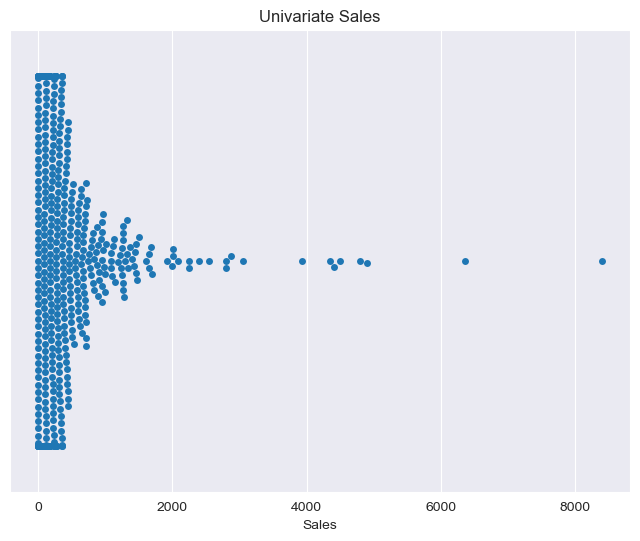

In [274]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x=df_sample_for_visualization['Sales'])
plt.title('Univariate Sales')
plt.show()

In [275]:
plt.figure(figsize=(8, 6))
sns.pairplot(df_sample_for_visualization['Sales'])
plt.title('Univariate Sales')
plt.show()


TypeError: 'data' must be pandas DataFrame object, not: <class 'pandas.core.series.Series'>

<Figure size 800x600 with 0 Axes>

Task 3

3.1 Two categorical variables: Segment and Sub-Category

In [276]:
# show segment relationship with sub-categories
pd.pivot_table(df_categorical_data_sample, values='Segment', columns= 'Sub-Category', aggfunc='count')

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Segment,65,53,97,143,30,80,8,25,20,85,34,10,129,79,79,23,39


In [277]:
# break out segments and relationships with each sub-category.
print(df_categorical_data_sample.shape)
df_cat_cust_products = pd.crosstab(df_categorical_data_sample['Segment'], df_categorical_data_sample['Sub-Category'])
print(df_cat_cust_products)

(1000, 18)
Sub-Category  Accessories  Appliances  Art  Binders  Bookcases  Chairs  \
Segment                                                                  
Consumer               32          24   44       69         16      42   
Corporate              22          18   30       47         12      20   
Home Office            11          11   23       27          2      18   

Sub-Category  Copiers  Envelopes  Fasteners  Furnishings  Labels  Machines  \
Segment                                                                      
Consumer            4         11          9           45      18         6   
Corporate           3         10          4           25       9         3   
Home Office         1          4          7           15       7         1   

Sub-Category  Paper  Phones  Storage  Supplies  Tables  
Segment                                                 
Consumer         70      39       44        12      18  
Corporate        40      32       19         5      11  

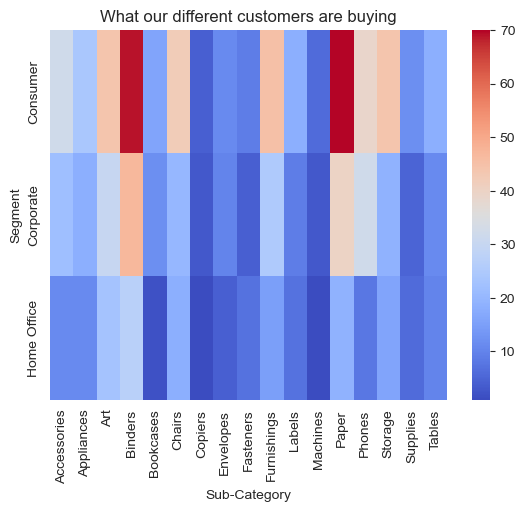

In [278]:
# visualize heatmap of segments to sub-categories
sns.heatmap(df_cat_cust_products, cmap='coolwarm')
plt.title("What our different customers are buying")
plt.show()

In [279]:
# state and category
contingency_table_state_cat = pd.crosstab(df_categorical_data_sample['State'], df_categorical_data_sample['Category'])
print(contingency_table_state_cat)

Category        Furniture  Office Supplies  Technology
State                                                 
Alabama                 0                1           2
Arizona                 5               15           5
Arkansas                1                4           3
California             40              120          31
Colorado                8               10           4
Connecticut             1                4           2
Delaware                3                5           0
Florida                 5               16           6
Georgia                 6               18           5
Idaho                   0                0           1
Illinois               13               21           4
Indiana                 5                8           4
Iowa                    0                1           0
Kansas                  0                2           0
Kentucky                2               10           0
Louisiana               0                1           0
Maryland  

In [280]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_state_cat)
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

# The score of 0.547 suggests there is no correlation between state and category.



Chi-Square Test Results:
Chi-Square Statistic: 83.80365900836848
P-value: 0.5469451512603871
Degrees of Freedom: 86


3.2 Numeric Vs Numeric 

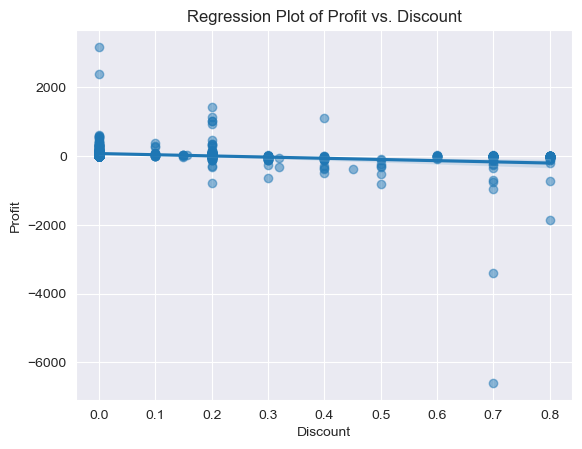

In [281]:
"""
The downward trend in profit as discount increases emphasized.
"""

#spin up sample
df_profit_discount = df_numeric_cust_features.sample(n=1000, random_state=42)

#plot
sns.regplot(x='Discount', y='Profit', data=df_profit_discount, scatter_kws={'alpha':0.5})
plt.title('Regression Plot of Profit vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()



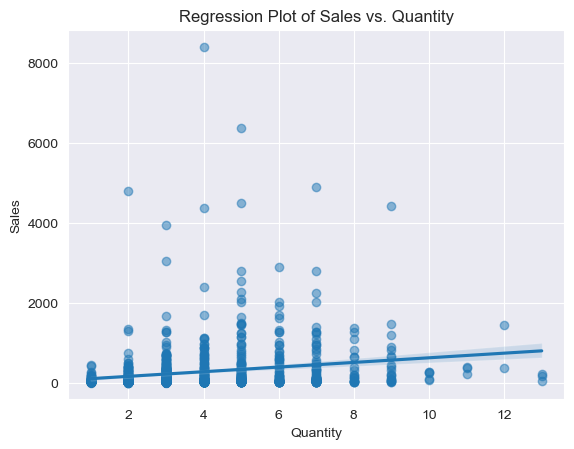

In [282]:
""" the regression between sales and quantity, highlights positive correlation where sales increase so does the quantity""" 

# spin up a sample
df_sales_quantity = df_numeric_cust_features.sample(n=1000, random_state=42)
# plot df
sns.regplot(x='Quantity', y='Sales', data=df_sales_quantity, scatter_kws={'alpha':0.5})
plt.title('Regression Plot of Sales vs. Quantity')
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.show()


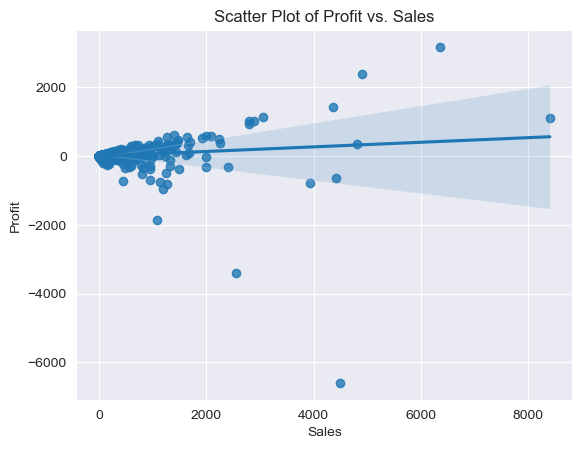

In [283]:
""" in general the more sales the bigger the tendency to make more profit"""

df_profit_discount = df_numeric_cust_features.sample(n=1000, random_state=42)

sns.regplot(x='Sales', y='Profit', data=df_profit_discount)
plt.title('Scatter Plot of Profit vs. Sales')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


In [284]:
# a quick summary again of the correlations between the said numerics
correlation_r = df_numeric_data_sample.corr()
print(correlation_r)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.201611  0.016444  0.131584
Quantity  0.201611  1.000000 -0.035793  0.031070
Discount  0.016444 -0.035793  1.000000 -0.241327
Profit    0.131584  0.031070 -0.241327  1.000000


<Axes: >

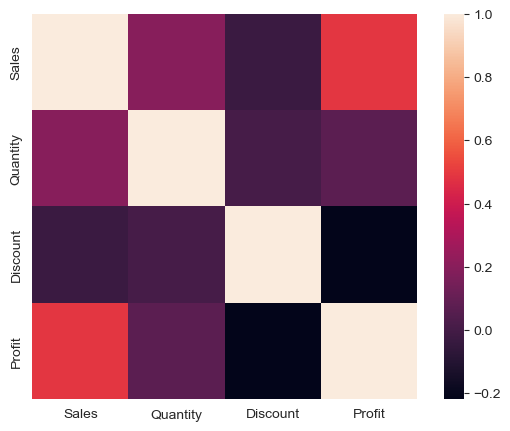

In [285]:
"""To recap our correlation matrix for numerical features"""
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(correlation, square=True)

3.3 Categorical Vs Numerical 

3.3.1 Profit vs Ship Date

In [267]:
# make categorical and numeric sample that we merge so we can evaluate categorical and numerical features together to look at profit (numeric) and ship date (categorical)
df_cat_sample = df_categorical_cust_info.sample(n=1000, random_state=42)
df_num_sample = df_numeric_cust_features.sample(n=1000, random_state=42)

# merge dataframe
df_combined = pd.concat([df_cat_sample, df_num_sample], axis=1)

# use datetime for x axis timeline
df_combined['Ship Date'] = pd.to_datetime(df_combined['Ship Date'], dayfirst=True)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


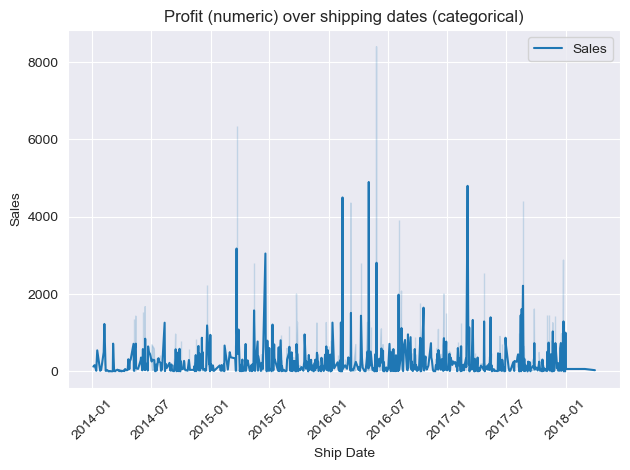

In [268]:
sns.lineplot(x='Ship Date', y='Sales', data=df_combined, label='Sales')
plt.title('Profit (numeric) over shipping dates (categorical)')
plt.xlabel('Ship Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability if needed
plt.legend()
plt.tight_layout()  # Ensures labels fit within the plot area
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

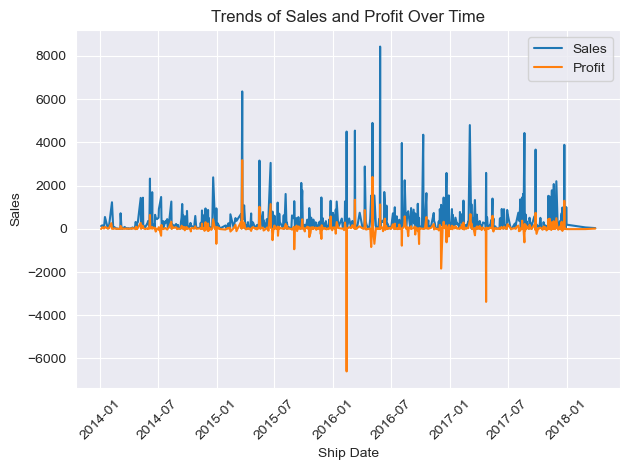

In [286]:
# sum sale and profit within each group of ship date
df_ship_date_summary = df_combined.groupby('Ship Date').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# profit with sales overlaid (numeric) vs shipping date (categorical)
sns.lineplot(x='Ship Date', y='Sales', data=df_ship_date_summary, label='Sales')
sns.lineplot(x='Ship Date', y='Profit', data=df_ship_date_summary, label='Profit')
plt.title('Trends of Sales and Profit Over Time')
plt.xlabel('Ship Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability if needed
plt.legend()
plt.tight_layout()  # Ensures labels fit within the plot area
plt.show()

3.3.2 Sub-category to Sales

In [287]:
# Sub-category (categorical) and Sales (numeric)
df_cat_to_sale = df_combined.groupby('Sub-Category')['Sales'].sum().reset_index()
df_sort_cat_to_sale = df_cat_to_sale.sort_values(by='Sales', ascending=False)
print(df_sort_cat_to_sale)

   Sub-Category        Sales
5        Chairs  44994.97900
3       Binders  28469.70200
16       Tables  27411.78528
14      Storage  26984.78400
13       Phones  26356.14400
11     Machines  19548.86800
6       Copiers  19479.75200
4     Bookcases  14672.42120
0   Accessories  13845.38000
1    Appliances   9502.93800
9   Furnishings   8829.85000
15     Supplies   6753.40400
12        Paper   6150.94600
2           Art   4281.52600
7     Envelopes   1930.67200
10       Labels   1153.81800
8     Fasteners    261.40600


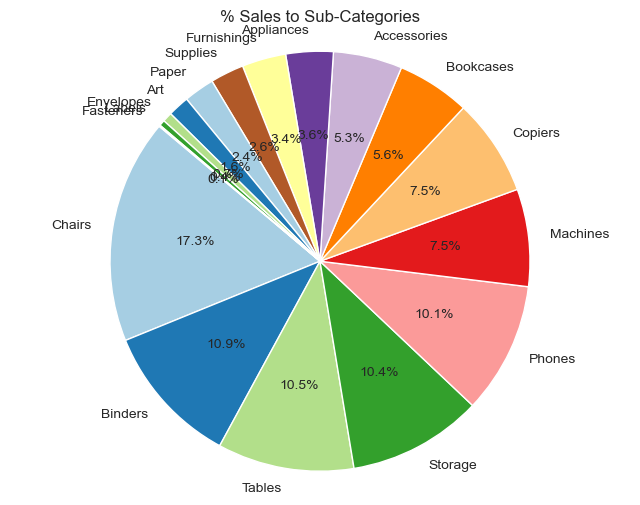

In [288]:
# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(df_sort_cat_to_sale['Sales'], labels=df_sort_cat_to_sale['Sub-Category'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
# Add title and make aspect ratio equal to ensure circular pie chart
plt.title('% Sales to Sub-Categories')
plt.axis('equal')
# Display the chart
plt.show()

3.3.3 Product name to discount

In [289]:
# Product (categorical) to discount(numeric) most discounted products
# binders is the firms second best seller and the most discounted product!

df_discount_product = df_combined.groupby('Product Name')['Discount'].sum().reset_index()
df_sort_discount_product = df_discount_product.sort_values(by='Discount', ascending=False)
print(df_sort_discount_product.head())
print(df_sort_discount_product.tail())

                                          Product Name  Discount
109                            Avery Non-Stick Binders       2.4
588                   Satellite Sectional Post Binders       1.8
669            Wilson Jones Easy Flow II Sheet Lifters       1.8
564                                 Round Ring Binders       1.7
218  DXL Angle-View Binders with Locking Rings by S...       1.6
                                          Product Name  Discount
480                                         Newell 330       0.0
192                 Cisco SPA525G2 IP Phone - Wireless       0.0
477                                         Newell 324       0.0
476                                         Newell 321       0.0
747  invisibleSHIELD by ZAGG Smudge-Free Screen Pro...       0.0


3.3.4 Product name to sales

In [290]:
# Product Name (categorical) and Sales (numeric) relationship best selling product.
# clean up df
df_categorical_cust_info.drop("Sales", axis=1, inplace=True)
df_categorical_cust_info.drop("Year_Bin", axis=1, inplace=True)

# make sample
df_cat_sample = df_categorical_cust_info.sample(n=1000, random_state=42)
df_num_sample = df_numeric_cust_features.sample(n=1000, random_state=42)

df_combined = pd.concat([df_cat_sample, df_num_sample], axis=1)
df_product_to_Sales = df_combined.groupby('Product Name')['Sales'].sum().reset_index()
df_product_sales_sorted = df_product_to_Sales.sort_values(by='Sales', ascending=False)
print(df_product_sales_sorted.head())
print(df_product_sales_sorted.tail())


KeyError: "['Sales'] not found in axis"